# ***1. Import Libraries, Data***

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import gc
from tqdm.notebook import tqdm

In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s5e4/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s5e4/test.csv')

In [3]:
train.shape

(750000, 12)

In [4]:
train.dtypes

id                               int64
Podcast_Name                    object
Episode_Title                   object
Episode_Length_minutes         float64
Genre                           object
Host_Popularity_percentage     float64
Publication_Day                 object
Publication_Time                object
Guest_Popularity_percentage    float64
Number_of_Ads                  float64
Episode_Sentiment               object
Listening_Time_minutes         float64
dtype: object

In [5]:
train.isna().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [6]:
train.tail(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
749995,749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058
749996,749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242
749997,749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000
749998,749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939
749999,749999,Sports Central,Episode 99,24.10,Sports,22.45,Saturday,Night,36.72,0.0,Neutral,11.94439


In [7]:
test.head(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral


# ***2. Merging***

In [8]:
popularity = pd.concat([train['Host_Popularity_percentage'],train['Genre']],axis=1)
popularity


,Host_Popularity_percentage,Genre
0,74.81,True Crime
1,66.95,Comedy
2,69.97,Education
3,57.22,Technology
4,80.07,Health
...,...,...
749995,69.36,Education
749996,35.21,Business
749997,78.58,Lifestyle
749998,45.39,Lifestyle


***Merging Train And Test for Encoding purpose***

In [9]:
train = pd.concat([train,test])

# ***3. EDA & Encoding***

## ***3.1. Podcast_Name***

In [10]:
train['Podcast_Name'].unique()

array(['Mystery Matters', 'Joke Junction', 'Study Sessions',
       'Digital Digest', 'Mind & Body', 'Fitness First', 'Criminal Minds',
       'News Roundup', 'Daily Digest', 'Music Matters', 'Sports Central',
       'Melody Mix', 'Game Day', 'Gadget Geek', 'Global News',
       'Tech Talks', 'Sport Spot', 'Funny Folks', 'Sports Weekly',
       'Business Briefs', 'Tech Trends', 'Innovators', 'Health Hour',
       'Comedy Corner', 'Sound Waves', 'Brain Boost', "Athlete's Arena",
       'Wellness Wave', 'Style Guide', 'World Watch', 'Humor Hub',
       'Money Matters', 'Healthy Living', 'Home & Living',
       'Educational Nuggets', 'Market Masters', 'Learning Lab',
       'Lifestyle Lounge', 'Crime Chronicles', 'Detective Diaries',
       'Life Lessons', 'Current Affairs', 'Finance Focus', 'Laugh Line',
       'True Crime Stories', 'Business Insights', 'Fashion Forward',
       'Tune Time'], dtype=object)

### **Label Encoder cho Podcast_Name**

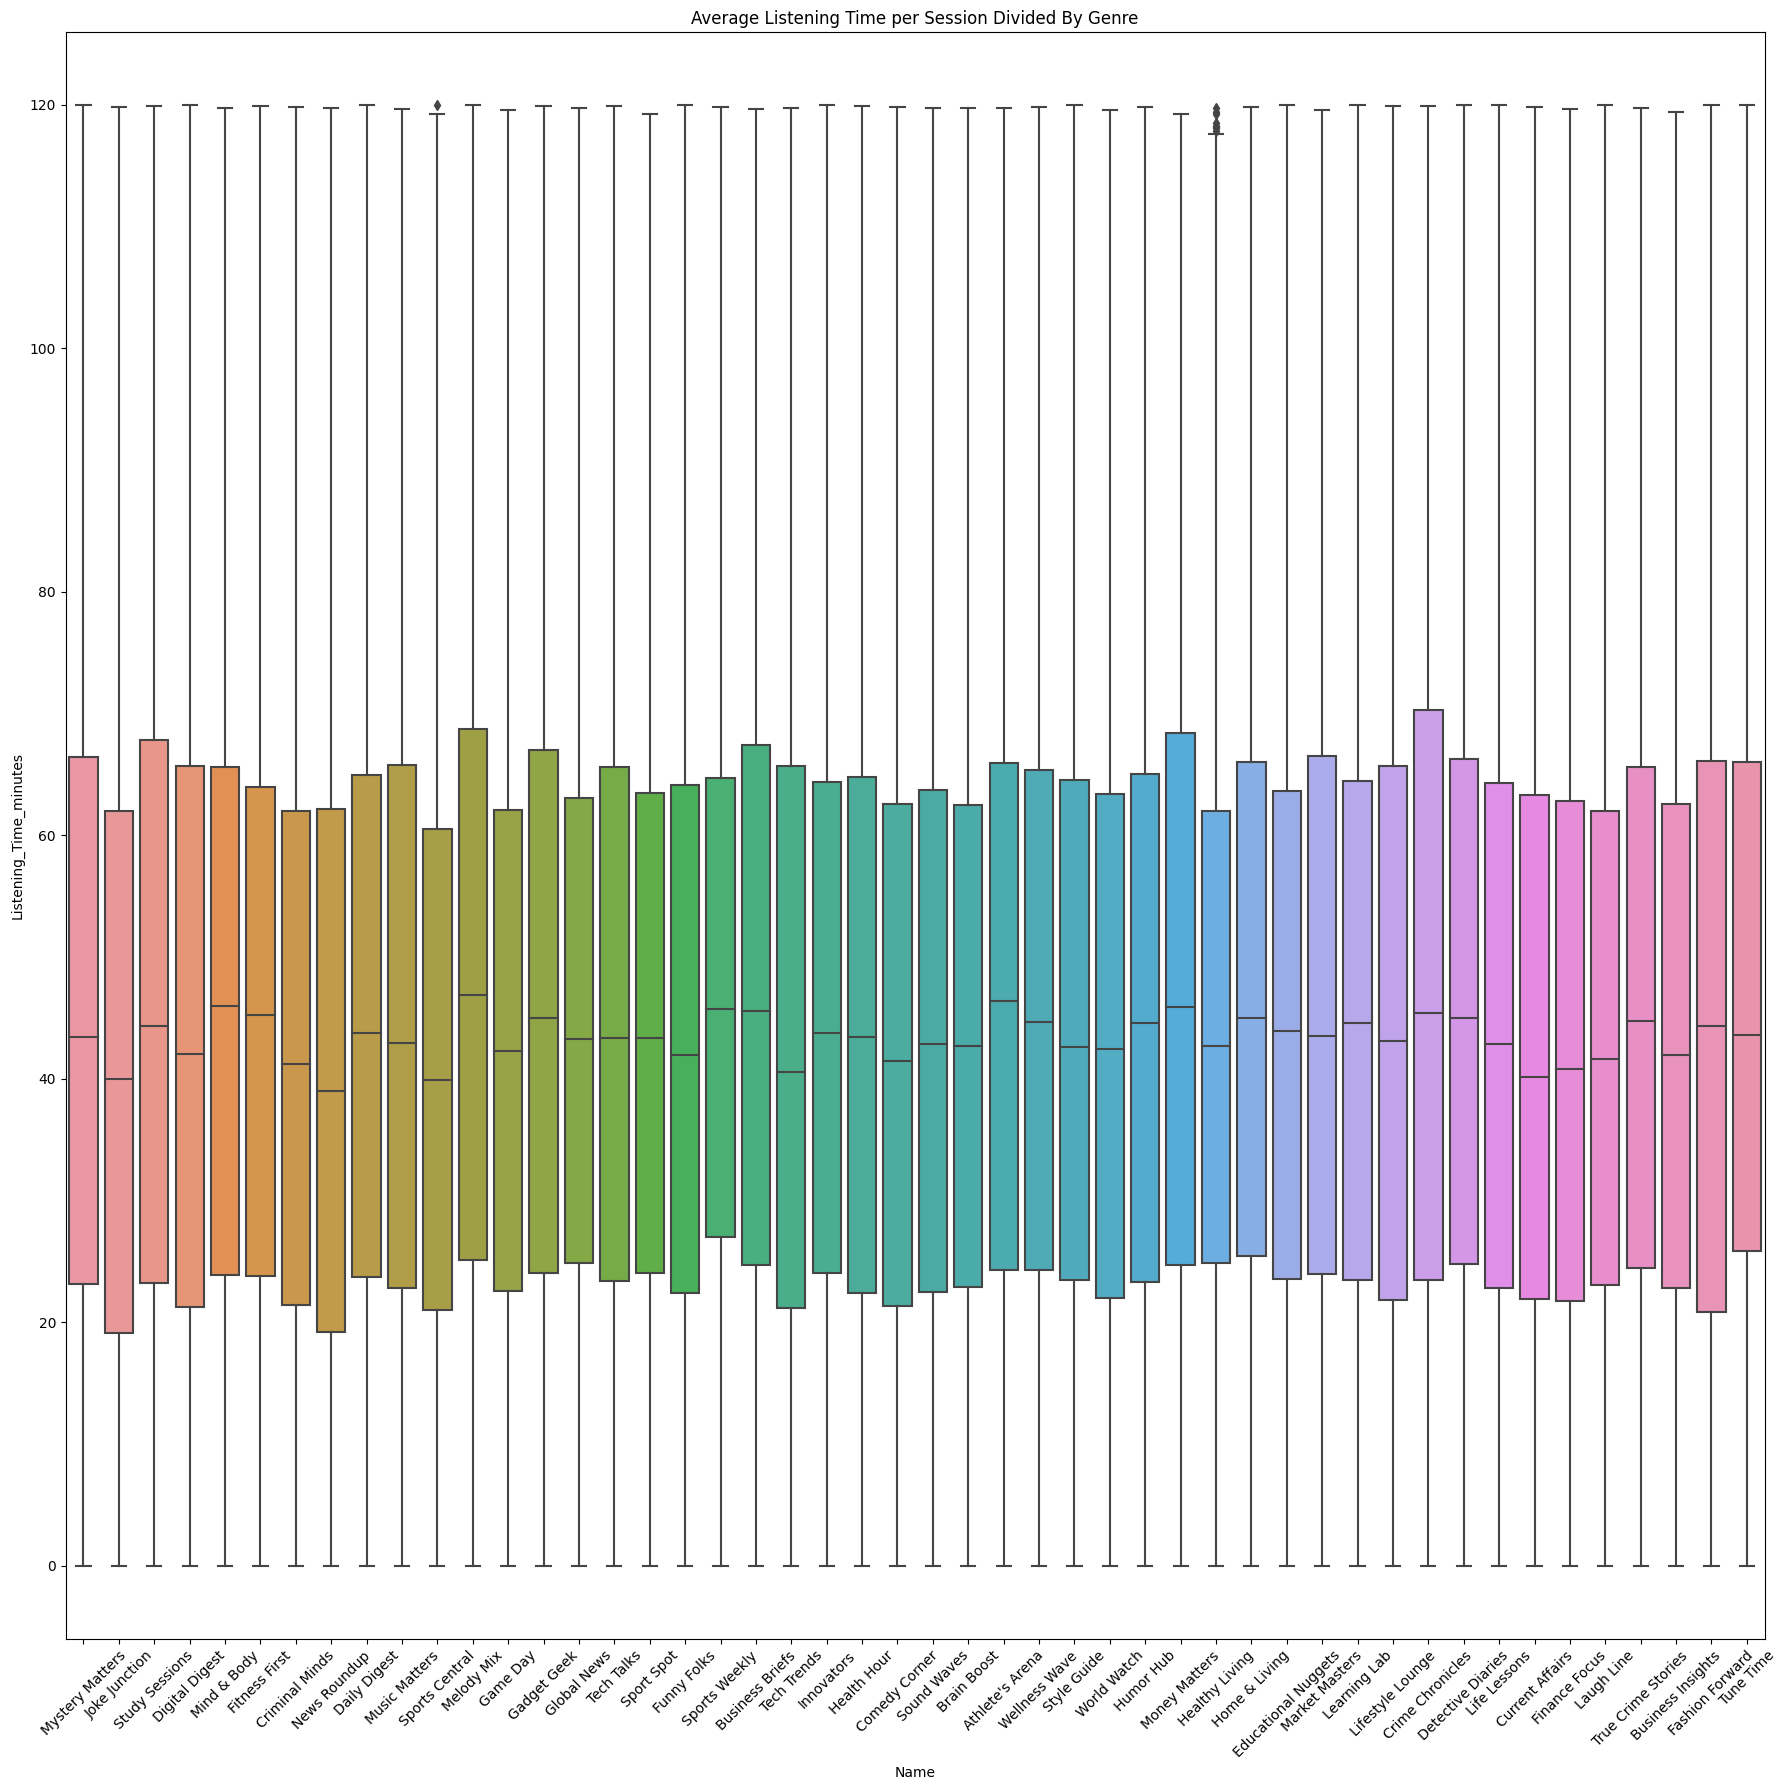

In [11]:
# Plot using a bar plot
plt.figure(figsize=(18, 18))
sns.boxplot(x = train['Podcast_Name'], y = train['Listening_Time_minutes'])
plt.title('Average Listening Time per Session Divided By Genre')
plt.xlabel('Name')
plt.ylabel('Listening_Time_minutes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
le = LabelEncoder()
le.fit(train['Podcast_Name'])
train['Podcast_Name'] = le.transform(train['Podcast_Name'])

In [13]:
train.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,34,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,24,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,40,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,10,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,31,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
5,5,14,Episode 19,26.54,Health,48.96,Saturday,Afternoon,NaN,3.0,Positive,22.77047
6,6,6,Episode 47,69.83,True Crime,35.82,Sunday,Night,39.02,0.0,Neutral,64.75024
7,7,35,Episode 44,48.52,News,44.99,Thursday,Night,20.12,0.0,Positive,22.37517
8,8,8,Episode 32,105.87,News,69.81,Monday,Evening,NaN,2.0,Neutral,68.00124
9,9,33,Episode 81,NaN,Music,82.18,Thursday,Night,59.72,3.0,Neutral,45.94761


## ***3.2 Genre*** 

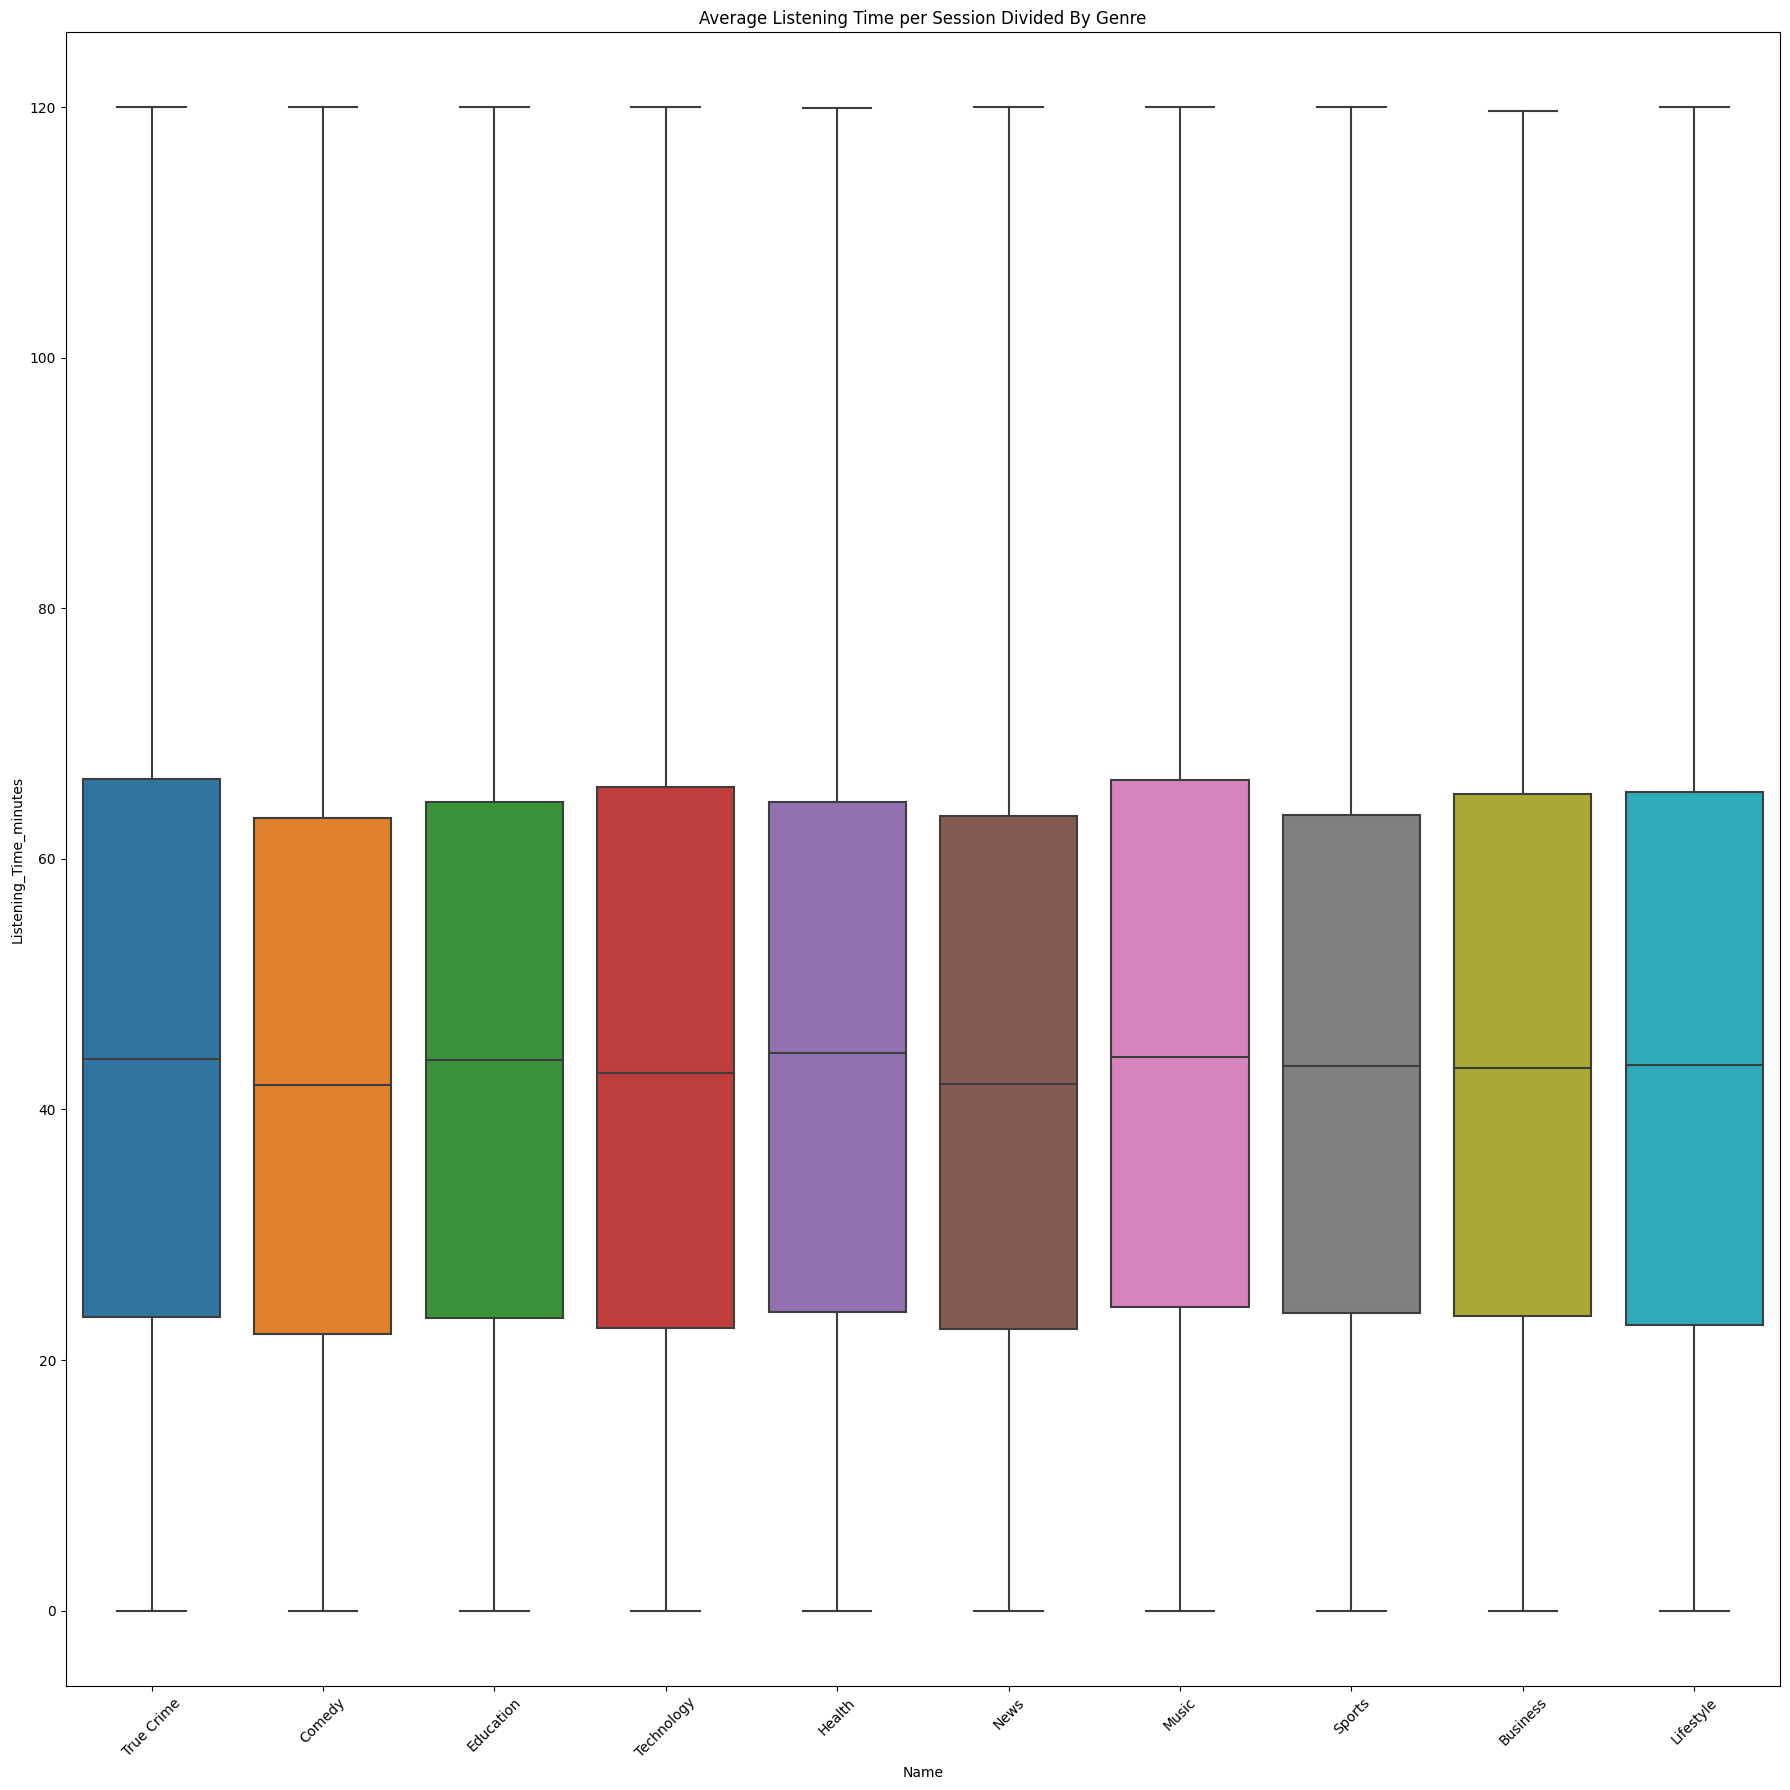

In [14]:
# Plot using a bar plot
plt.figure(figsize=(18, 18))
sns.boxplot(x = train['Genre'], y = train['Listening_Time_minutes'])
plt.title('Average Listening Time per Session Divided By Genre')
plt.xlabel('Name')
plt.ylabel('Listening_Time_minutes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
train['Genre'].unique()

array(['True Crime', 'Comedy', 'Education', 'Technology', 'Health',
       'News', 'Music', 'Sports', 'Business', 'Lifestyle'], dtype=object)

In [16]:
le = LabelEncoder()
le.fit(train['Genre'])
train['Genre'] = le.transform(train['Genre'])

In [17]:
train.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,34,Episode 98,NaN,9,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,24,Episode 26,119.80,1,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,40,Episode 16,73.90,2,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,10,Episode 45,67.17,8,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,31,Episode 86,110.51,3,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
5,5,14,Episode 19,26.54,3,48.96,Saturday,Afternoon,NaN,3.0,Positive,22.77047
6,6,6,Episode 47,69.83,9,35.82,Sunday,Night,39.02,0.0,Neutral,64.75024
7,7,35,Episode 44,48.52,6,44.99,Thursday,Night,20.12,0.0,Positive,22.37517
8,8,8,Episode 32,105.87,6,69.81,Monday,Evening,NaN,2.0,Neutral,68.00124
9,9,33,Episode 81,NaN,5,82.18,Thursday,Night,59.72,3.0,Neutral,45.94761


## ***3.3 Episode Title***

In [18]:
train['Episode_Title'] = train['Episode_Title'].str.extract(r'(\d+)').astype(float)

In [19]:
train

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,34,98.0,NaN,9,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,24,26.0,119.80,1,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,40,16.0,73.90,2,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,10,45.0,67.17,8,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,31,86.0,110.51,3,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...,...
249995,999995,31,100.0,21.05,3,65.77,Saturday,Evening,96.40,3.0,Negative,NaN
249996,999996,24,85.0,85.50,1,41.47,Saturday,Night,30.52,2.0,Negative,NaN
249997,999997,24,63.0,12.11,1,25.92,Thursday,Evening,73.69,1.0,Neutral,NaN
249998,999998,29,46.0,113.46,0,43.47,Friday,Night,93.59,3.0,Positive,NaN


## ***3.4 Publication_Day***

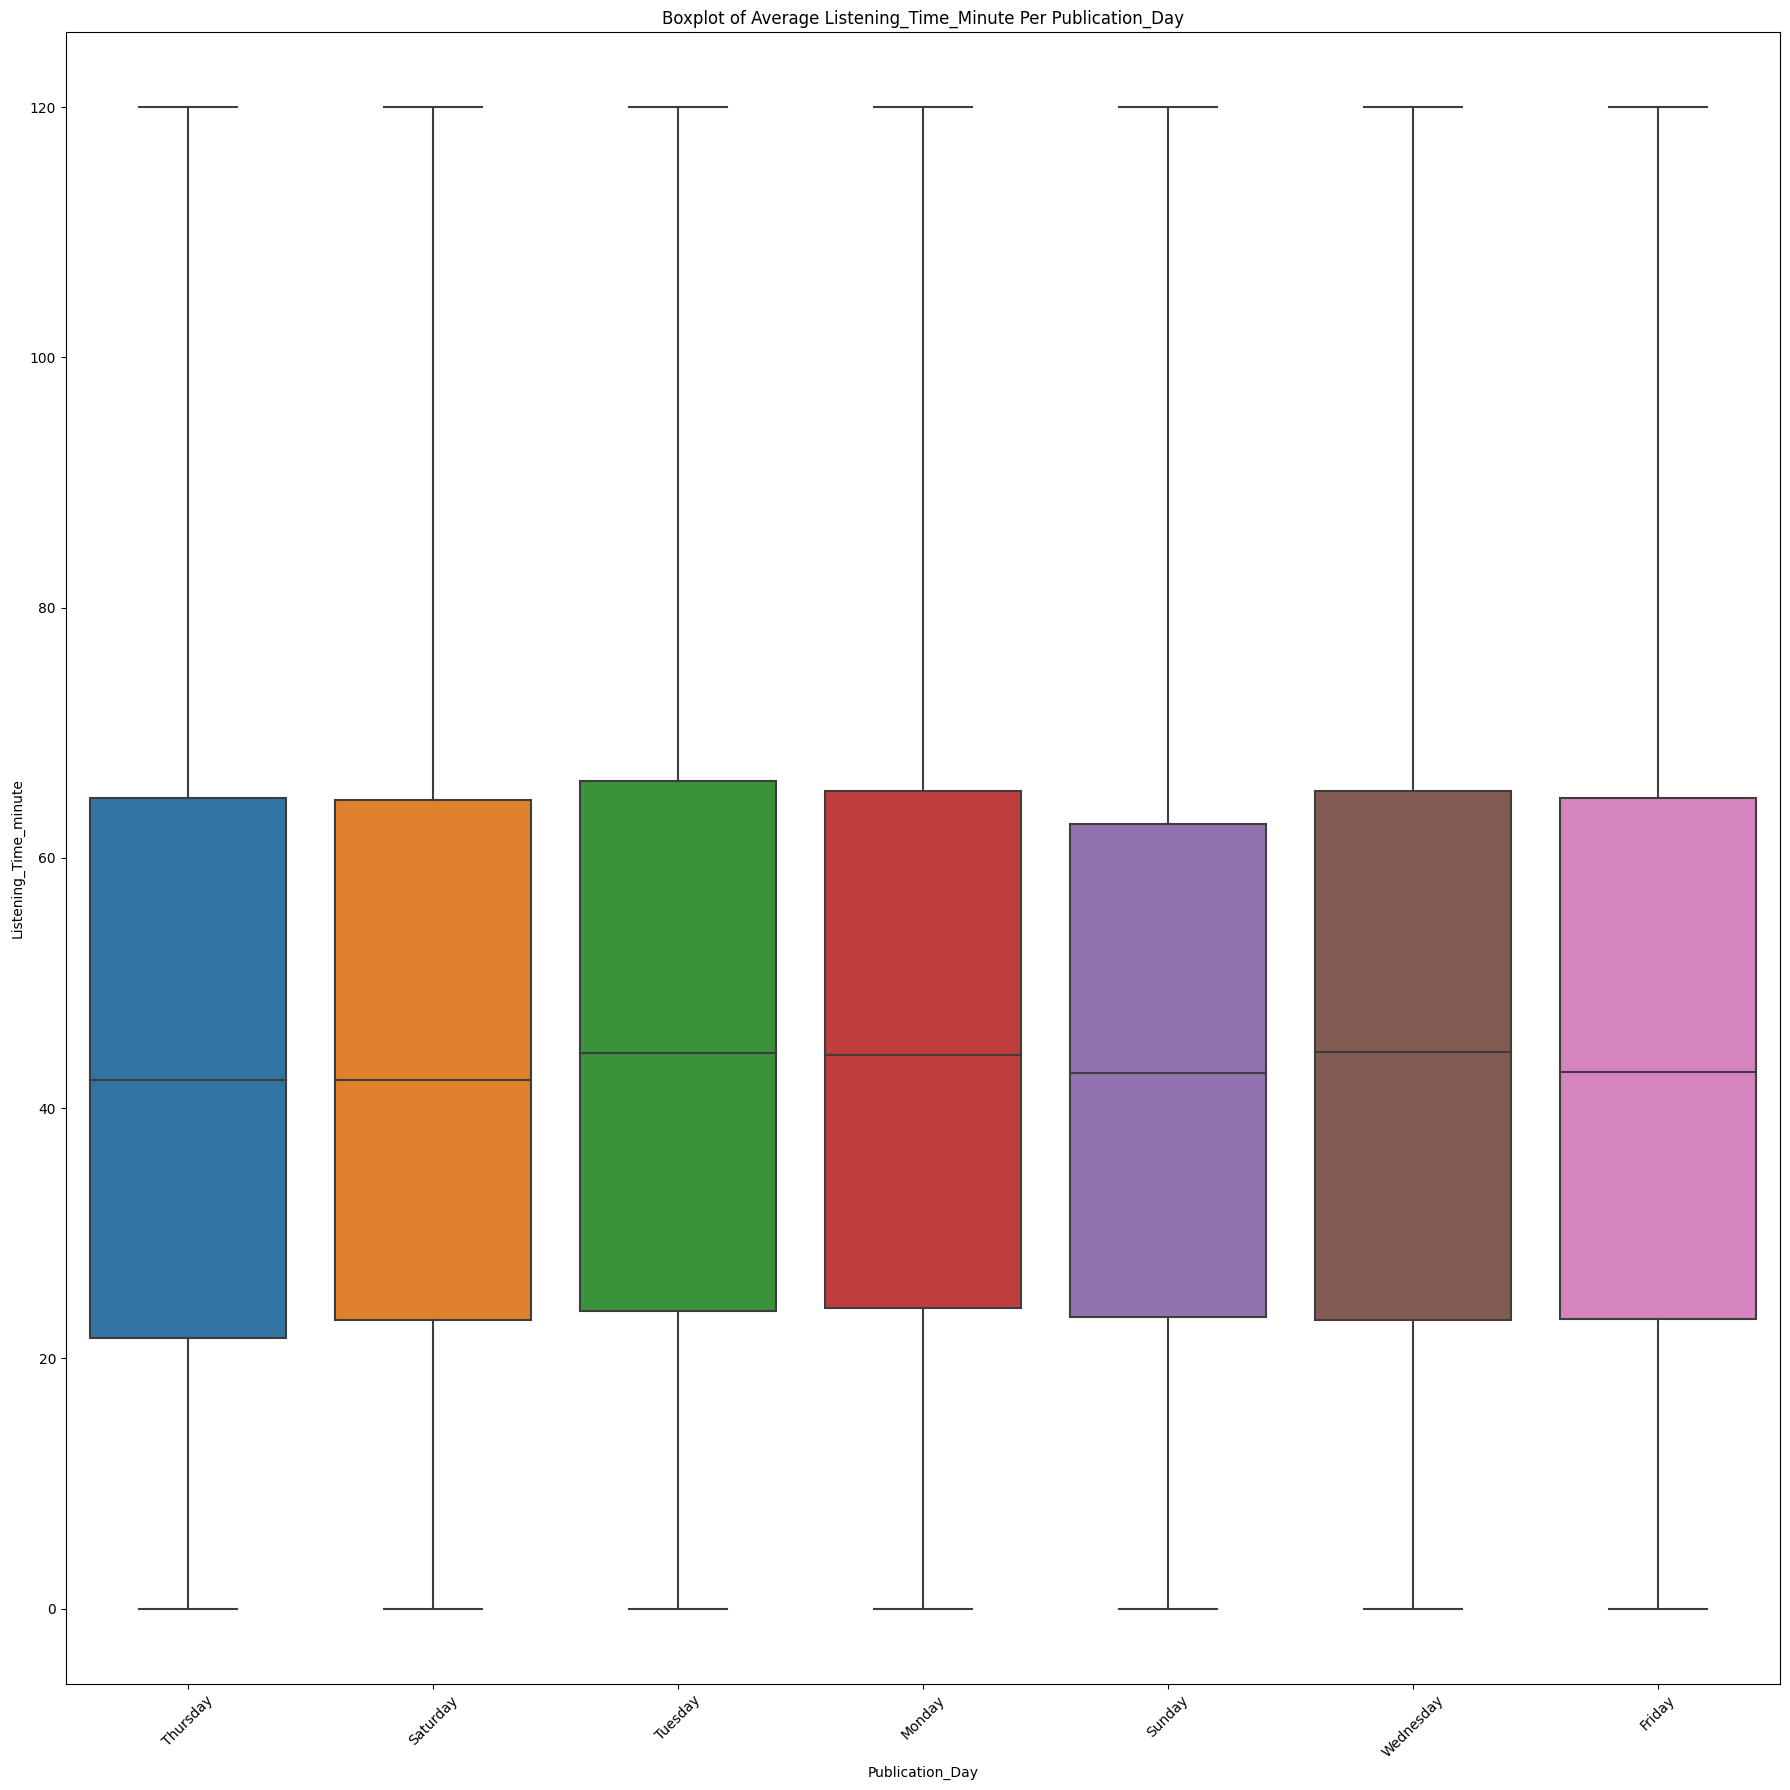

In [20]:
# Plot using a bar plot
plt.figure(figsize=(18, 18))
sns.boxplot(data = train, x ='Publication_Day', y = 'Listening_Time_minutes')
plt.title('Boxplot of Average Listening_Time_Minute Per Publication_Day')
plt.xlabel('Publication_Day')
plt.ylabel('Listening_Time_minute')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
le = LabelEncoder()
train['Publication_Day'] = le.fit_transform(train['Publication_Day'])
train['Publication_Day'] = train['Publication_Day'].astype('category')
train

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,34,98.0,NaN,9,74.81,4,Night,NaN,0.0,Positive,31.41998
1,1,24,26.0,119.80,1,66.95,2,Afternoon,75.95,2.0,Negative,88.01241
2,2,40,16.0,73.90,2,69.97,5,Evening,8.97,0.0,Negative,44.92531
3,3,10,45.0,67.17,8,57.22,1,Morning,78.70,2.0,Positive,46.27824
4,4,31,86.0,110.51,3,80.07,1,Afternoon,58.68,3.0,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...,...
249995,999995,31,100.0,21.05,3,65.77,2,Evening,96.40,3.0,Negative,NaN
249996,999996,24,85.0,85.50,1,41.47,2,Night,30.52,2.0,Negative,NaN
249997,999997,24,63.0,12.11,1,25.92,4,Evening,73.69,1.0,Neutral,NaN
249998,999998,29,46.0,113.46,0,43.47,0,Night,93.59,3.0,Positive,NaN


In [22]:
train['Publication_Day'].unique()

[4, 2, 5, 1, 3, 6, 0]
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

In [23]:
le.inverse_transform([0,1,2,3,4,5,6])

array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'], dtype=object)

In [24]:
train.drop(columns=['Publication_Day'],inplace=True)

## ***3.5 Publication_Time***

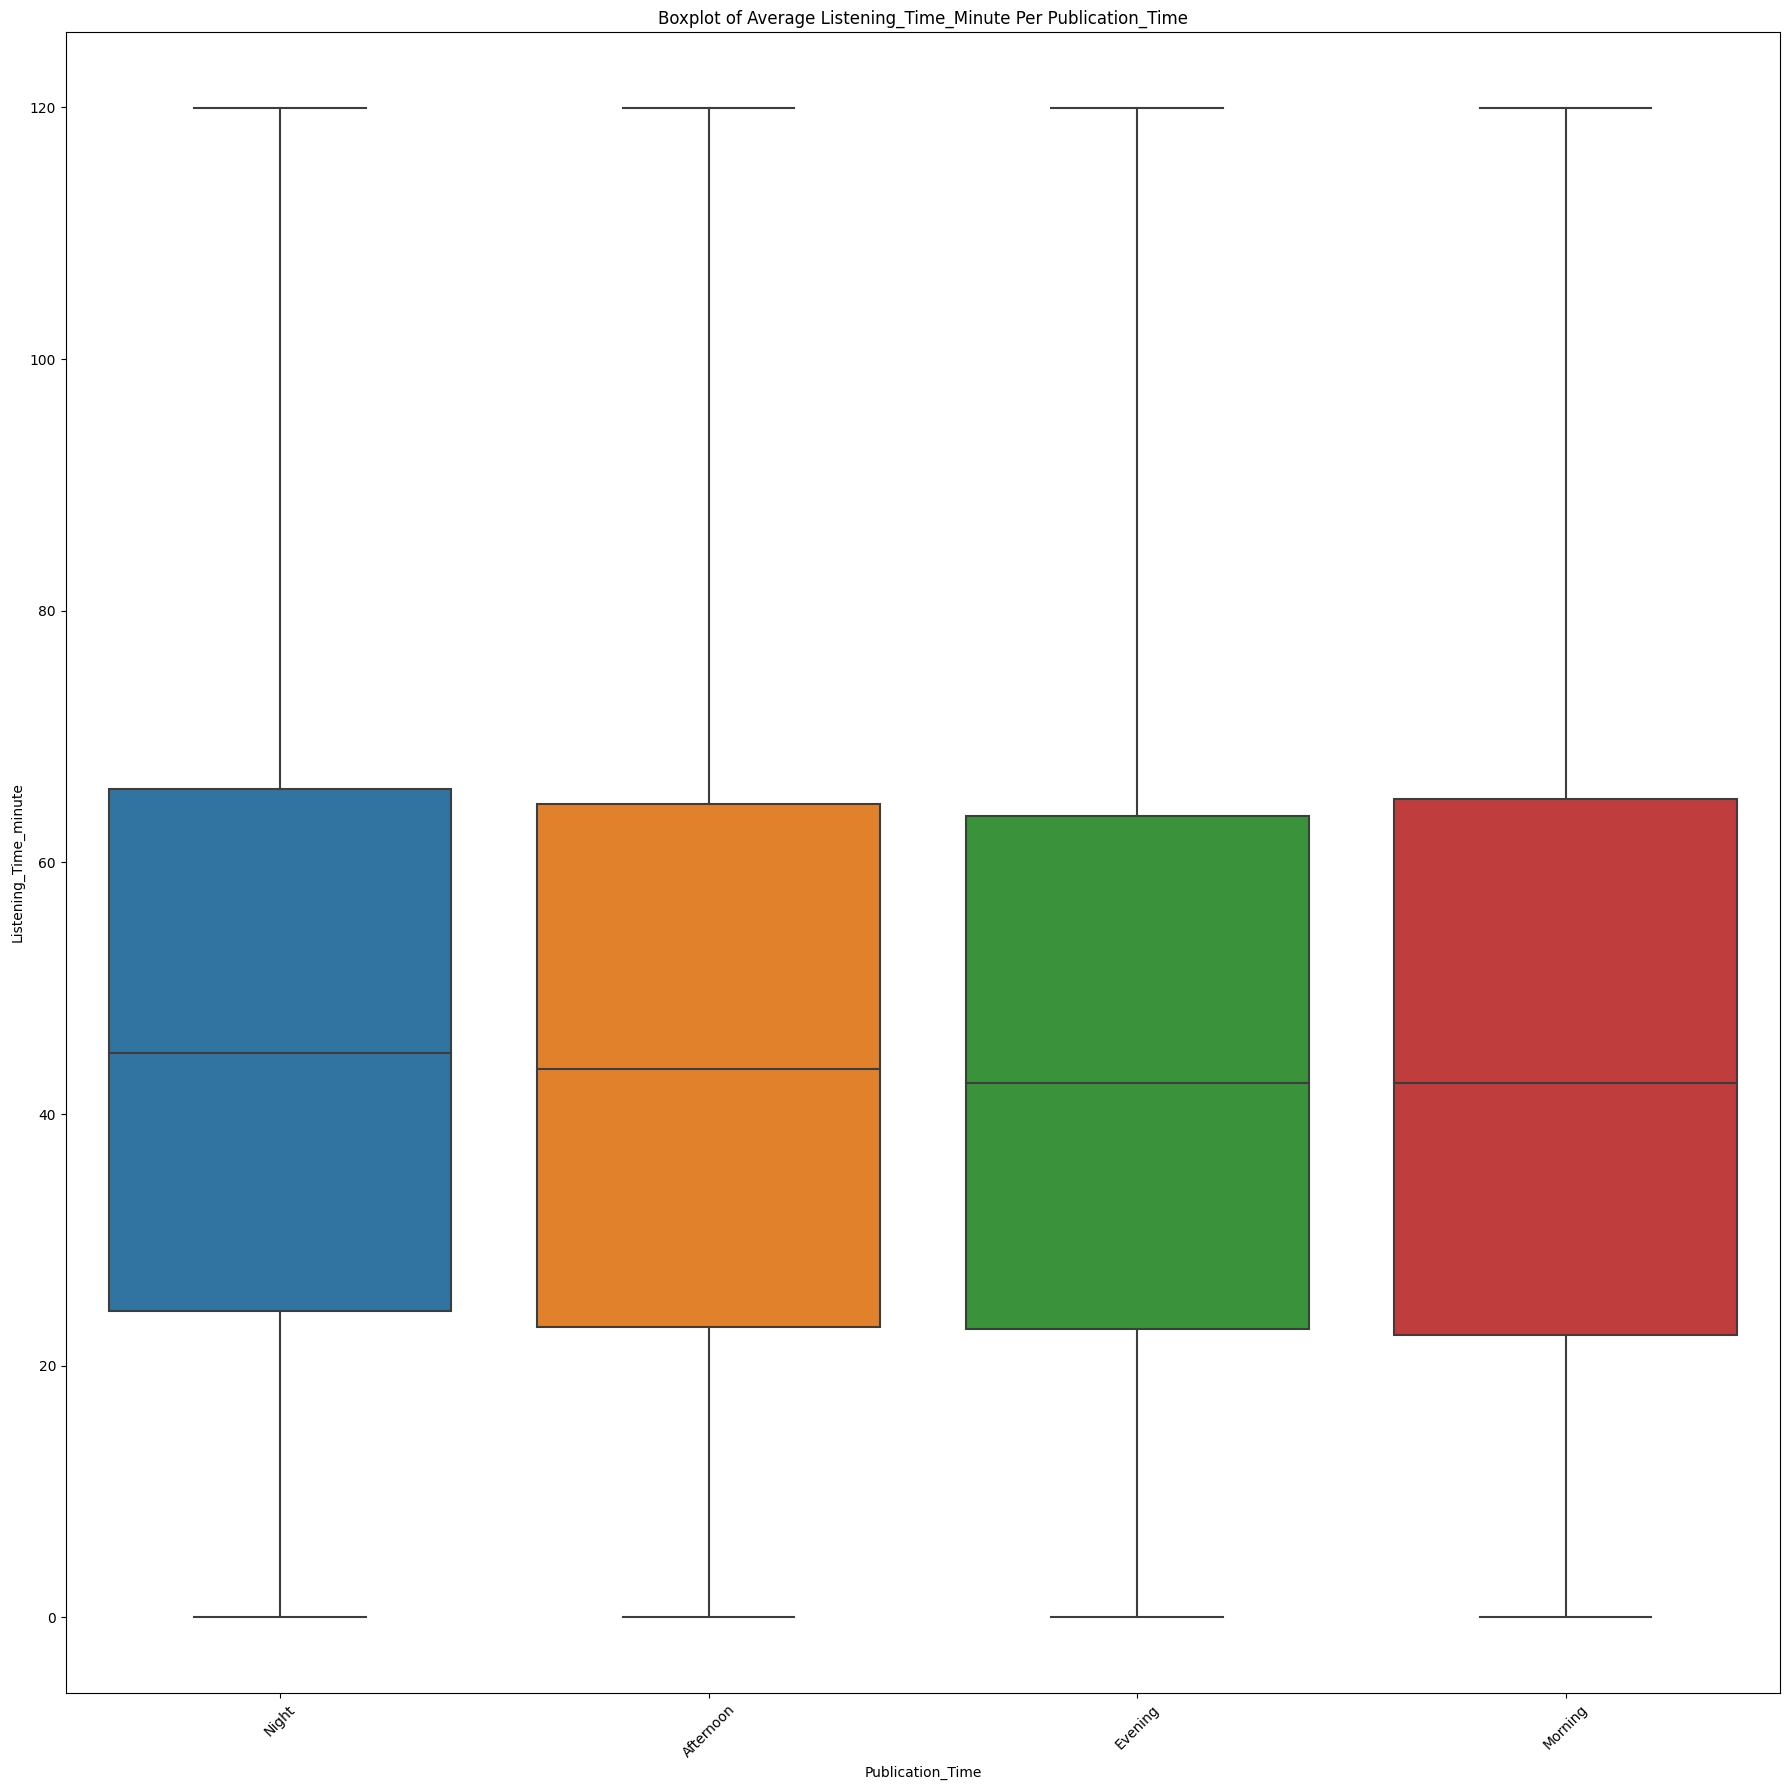

In [25]:
# Plot using a bar plot
plt.figure(figsize=(18, 18))
sns.boxplot(data = train, x ='Publication_Time', y = 'Listening_Time_minutes')
plt.title('Boxplot of Average Listening_Time_Minute Per Publication_Time')
plt.xlabel('Publication_Time')
plt.ylabel('Listening_Time_minute')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
train.iloc[:,:12:]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,34,98.0,NaN,9,74.81,Night,NaN,0.0,Positive,31.41998
1,1,24,26.0,119.80,1,66.95,Afternoon,75.95,2.0,Negative,88.01241
2,2,40,16.0,73.90,2,69.97,Evening,8.97,0.0,Negative,44.92531
3,3,10,45.0,67.17,8,57.22,Morning,78.70,2.0,Positive,46.27824
4,4,31,86.0,110.51,3,80.07,Afternoon,58.68,3.0,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...
249995,999995,31,100.0,21.05,3,65.77,Evening,96.40,3.0,Negative,NaN
249996,999996,24,85.0,85.50,1,41.47,Night,30.52,2.0,Negative,NaN
249997,999997,24,63.0,12.11,1,25.92,Evening,73.69,1.0,Neutral,NaN
249998,999998,29,46.0,113.46,0,43.47,Night,93.59,3.0,Positive,NaN


In [27]:
train['Publication_Time'].unique()

array(['Night', 'Afternoon', 'Evening', 'Morning'], dtype=object)

In [28]:
le = LabelEncoder()
train['Publication_Time'] = le.fit_transform(train['Publication_Time'])
train.iloc[:,:12:]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,34,98.0,NaN,9,74.81,3,NaN,0.0,Positive,31.41998
1,1,24,26.0,119.80,1,66.95,0,75.95,2.0,Negative,88.01241
2,2,40,16.0,73.90,2,69.97,1,8.97,0.0,Negative,44.92531
3,3,10,45.0,67.17,8,57.22,2,78.70,2.0,Positive,46.27824
4,4,31,86.0,110.51,3,80.07,0,58.68,3.0,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...
249995,999995,31,100.0,21.05,3,65.77,1,96.40,3.0,Negative,NaN
249996,999996,24,85.0,85.50,1,41.47,3,30.52,2.0,Negative,NaN
249997,999997,24,63.0,12.11,1,25.92,1,73.69,1.0,Neutral,NaN
249998,999998,29,46.0,113.46,0,43.47,3,93.59,3.0,Positive,NaN


In [29]:
# train['Publication_Day'] = train['Publication_Day'].astype('category')

In [30]:
le.inverse_transform([0,1,2,3])

array(['Afternoon', 'Evening', 'Morning', 'Night'], dtype=object)

In [31]:
train.drop(columns=['Publication_Time'],inplace=True)

## ***3.6 Episode_Sentiment***

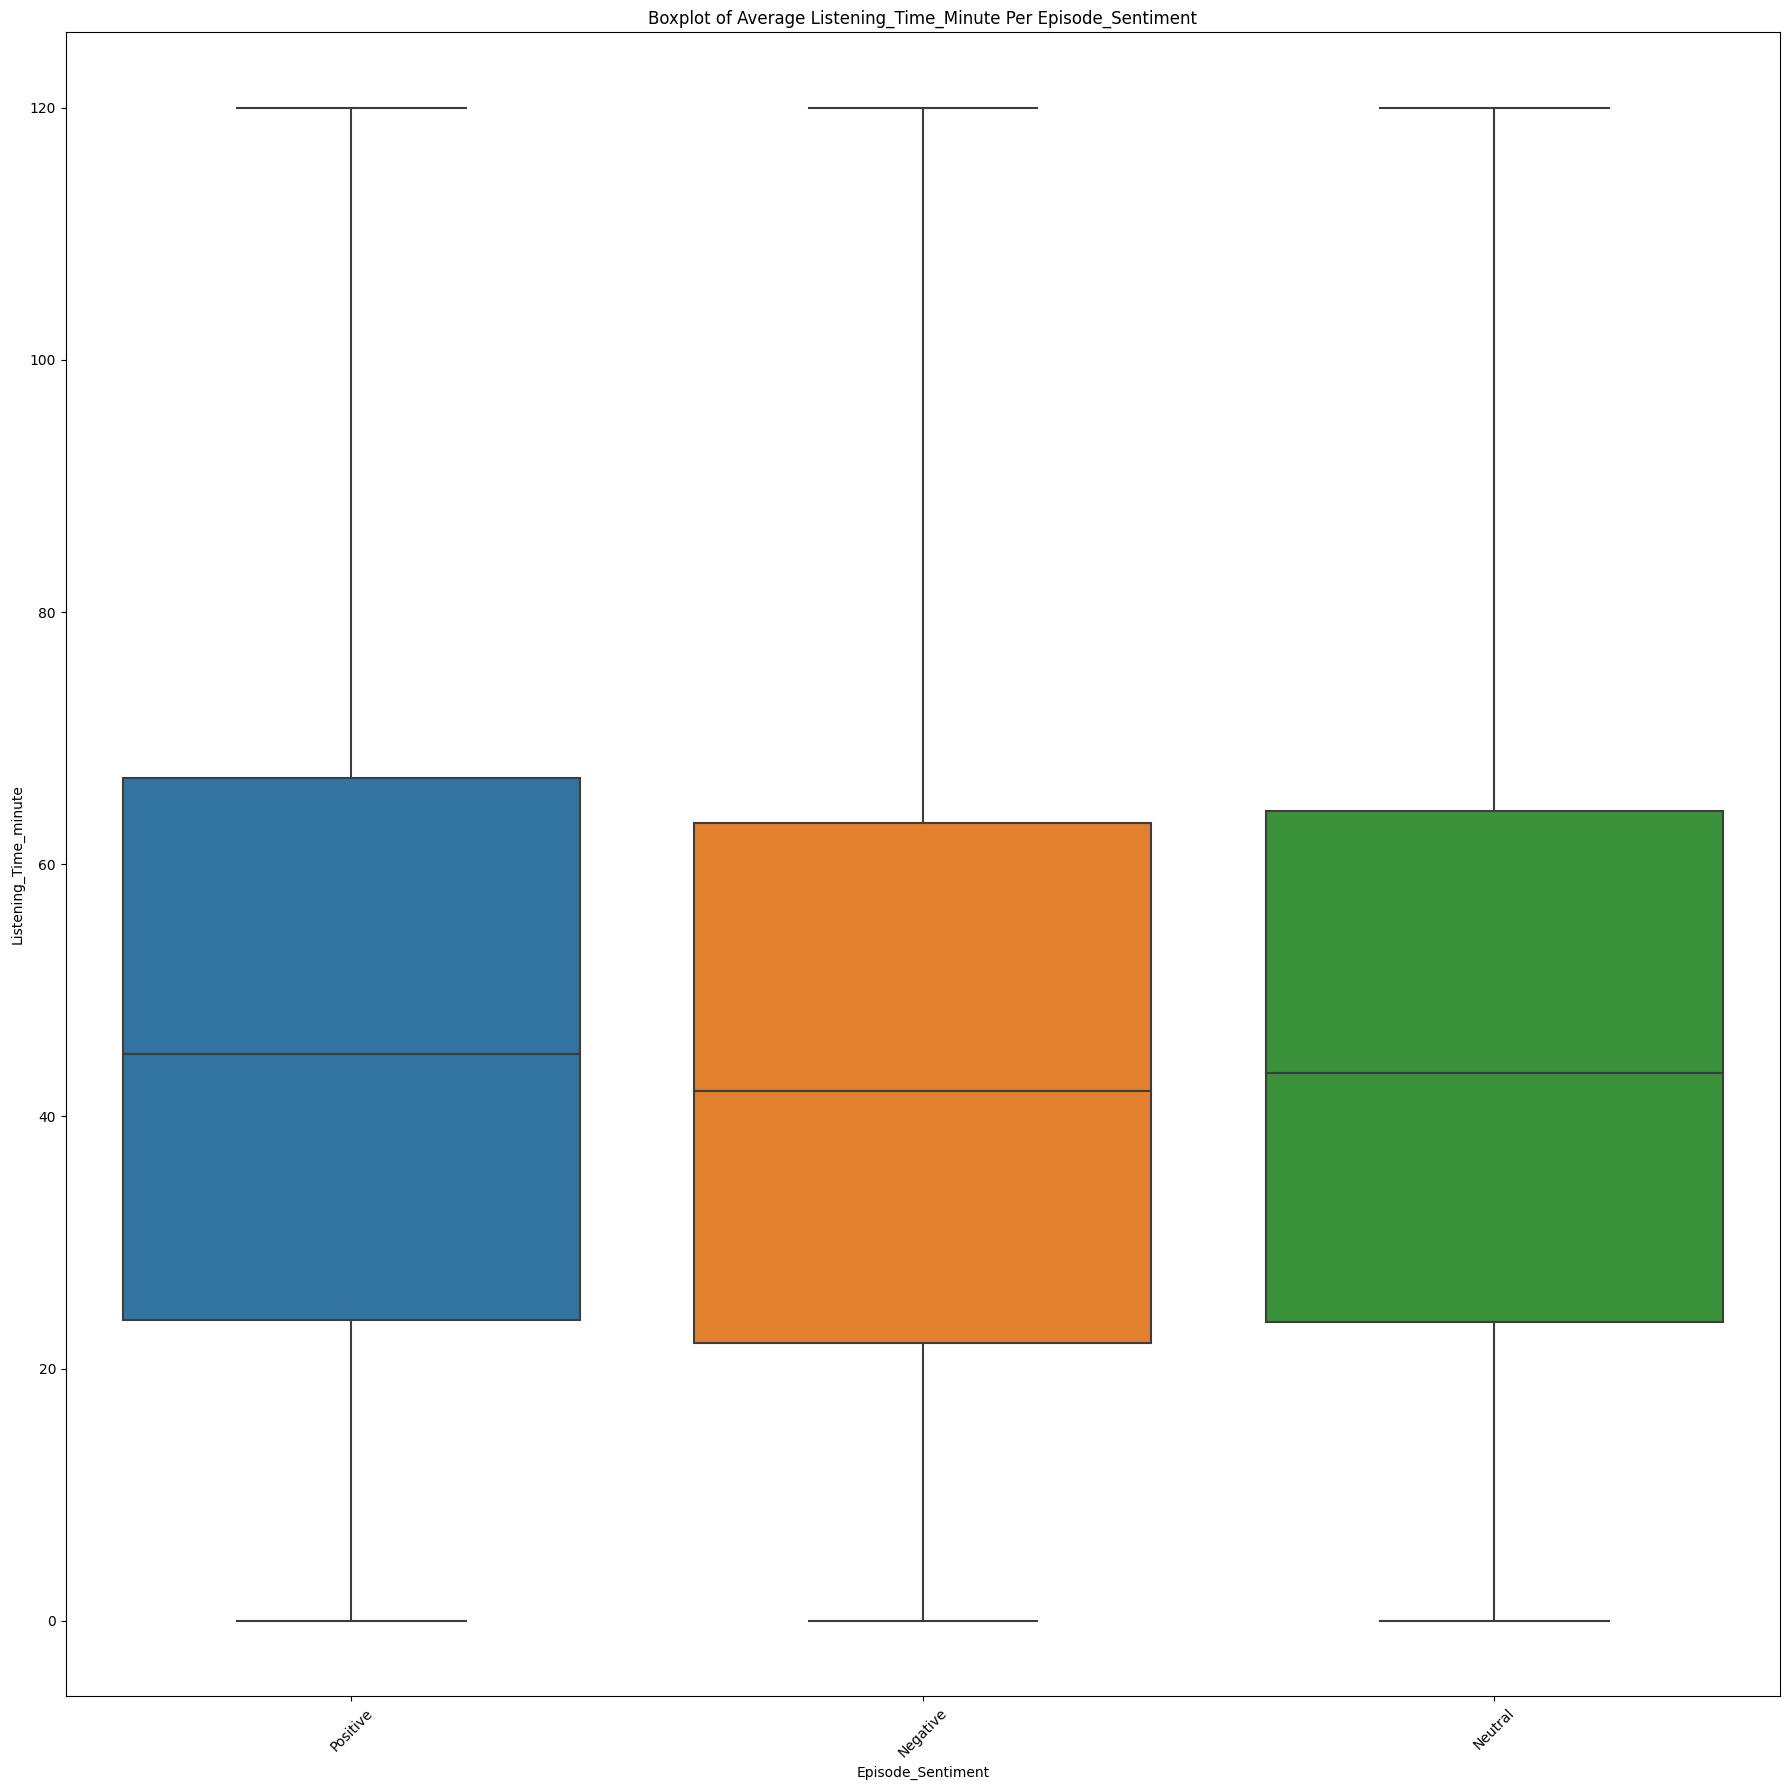

In [32]:
# Plot using a bar plot
plt.figure(figsize=(18, 18))
sns.boxplot(data = train, x ='Episode_Sentiment', y = 'Listening_Time_minutes')
plt.title('Boxplot of Average Listening_Time_Minute Per Episode_Sentiment')
plt.xlabel('Episode_Sentiment')
plt.ylabel('Listening_Time_minute')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
train.dtypes

id                               int64
Podcast_Name                     int64
Episode_Title                  float64
Episode_Length_minutes         float64
Genre                            int64
Host_Popularity_percentage     float64
Guest_Popularity_percentage    float64
Number_of_Ads                  float64
Episode_Sentiment               object
Listening_Time_minutes         float64
dtype: object

In [34]:
le = LabelEncoder()
train['Episode_Sentiment'] = le.fit_transform(train['Episode_Sentiment'])



# ***4. Feature Engineering***

In [35]:
# Convert the column to float32 or float64
train['Episode_Length_minutes'] = train['Episode_Length_minutes'].astype('float32')

# Now apply pd.cut
train['length_bucket'] = pd.cut(train['Episode_Length_minutes'], 
                               bins=[0, 30, 60, 90, 200],
                               labels=['short', 'medium', 'long', 'very_long'])

train['Guest_Popularity_bucket'] = pd.cut(train['Guest_Popularity_percentage'], 
                                             bins=[0, 20, 40, 60, 80, 100],
                                             labels=['immfamous', 'less_popular', 'moderately_popular', 'long', 'very_long'])


train['Host_Popularity_bucket'] = pd.cut(train['Host_Popularity_percentage'], 
                                             bins=[0, 20, 40, 60, 80, 100],
                                             labels=['immfamous', 'less_popular', 'moderately_popular', 'long', 'very_long'])

In [36]:
test = train[train['id'] > 749999]
train = train[train['id'] <= 749999]

In [37]:
import gc
gc.collect()

13808

# ***5. Outliers Handling***

## 4.1 Podcast_Name outliers

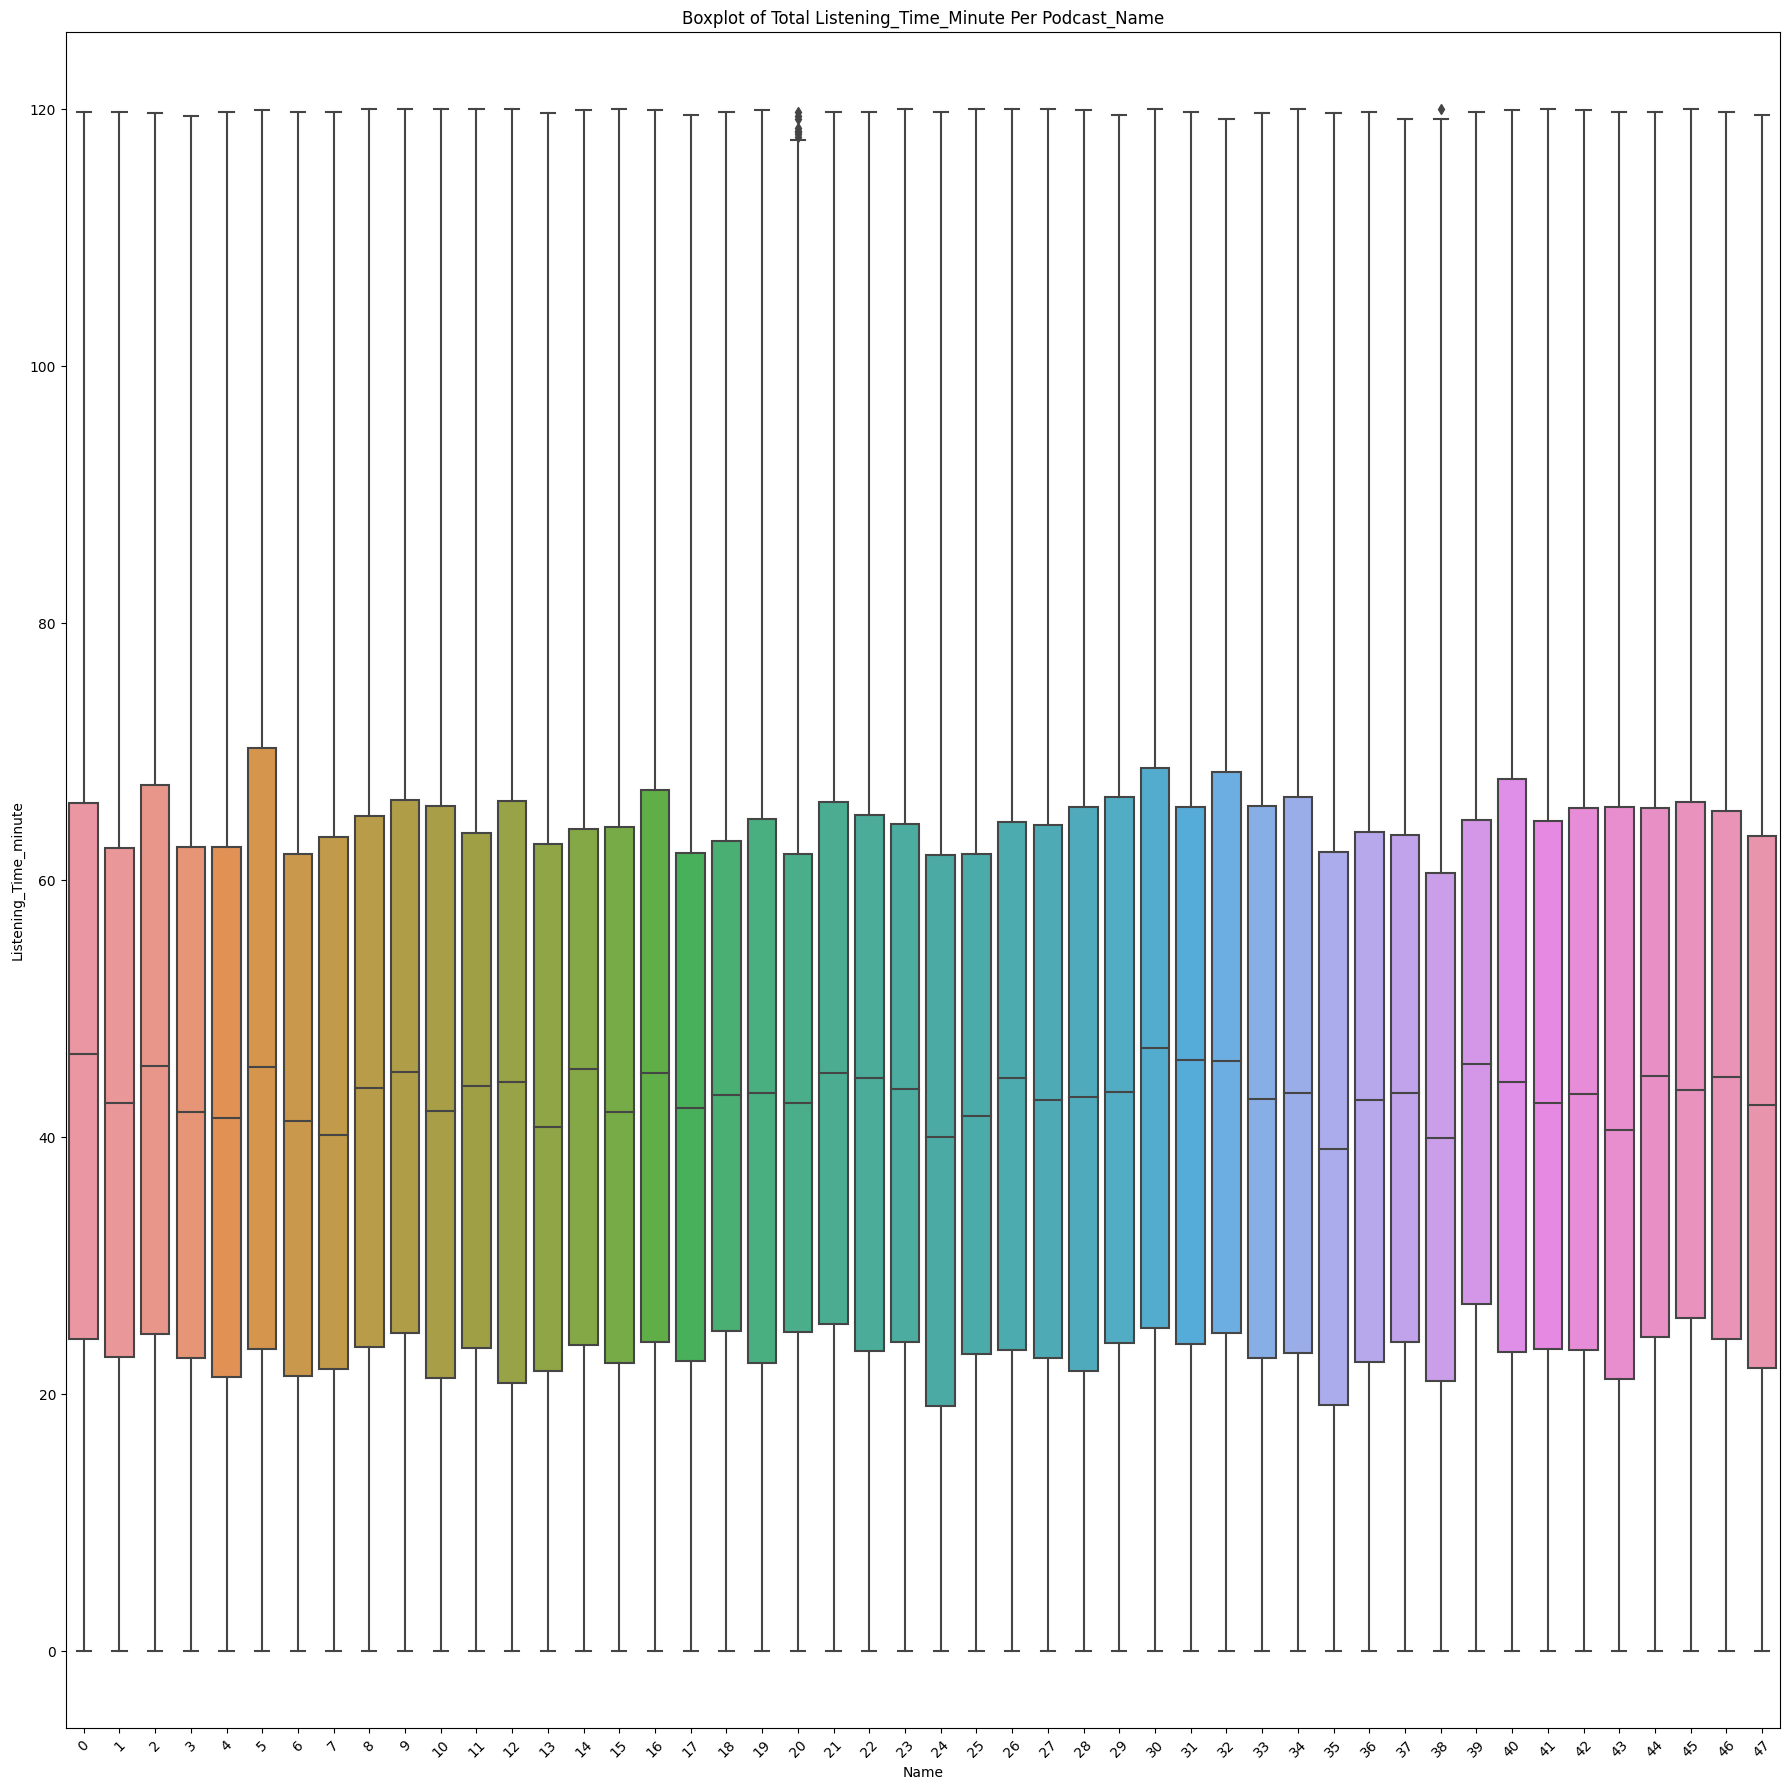

In [38]:
# Plot using a bar plot
plt.figure(figsize=(18, 18))
sns.boxplot(data = train, x ='Podcast_Name', y = 'Listening_Time_minutes')
plt.title('Boxplot of Total Listening_Time_Minute Per Podcast_Name')
plt.xlabel('Name')
plt.ylabel('Listening_Time_minute')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
# Identify outliers for 'Healthy Living' quantitatively
healthy_living_data = train[train['Podcast_Name'] == 20]['Listening_Time_minutes']

# Calculate Q1, Q3, and IQR
Q1 = healthy_living_data.quantile(0.25)
Q3 = healthy_living_data.quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
healthy_living_outliers = healthy_living_data.index[(healthy_living_data < lower_bound) | (healthy_living_data > upper_bound)]
print("\nOutliers for 'Healthy Living' podcast (Listening Time in minutes):")
print(healthy_living_outliers)
print(f"Number of outliers: {len(healthy_living_outliers)}")
print(f"Lower bound: {lower_bound:.2f} minutes")
print(f"Upper bound: {upper_bound:.2f} minutes")

#Remove outliers
train.drop(healthy_living_outliers, inplace=True)



Outliers for 'Healthy Living' podcast (Listening Time in minutes):
Index([54936, 109487, 202518, 327185, 448274, 532335, 585982, 709757], dtype='int64')
Number of outliers: 8
Lower bound: -30.85 minutes
Upper bound: 117.70 minutes


/tmp/ipykernel_31/3967608899.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(healthy_living_outliers, inplace=True)


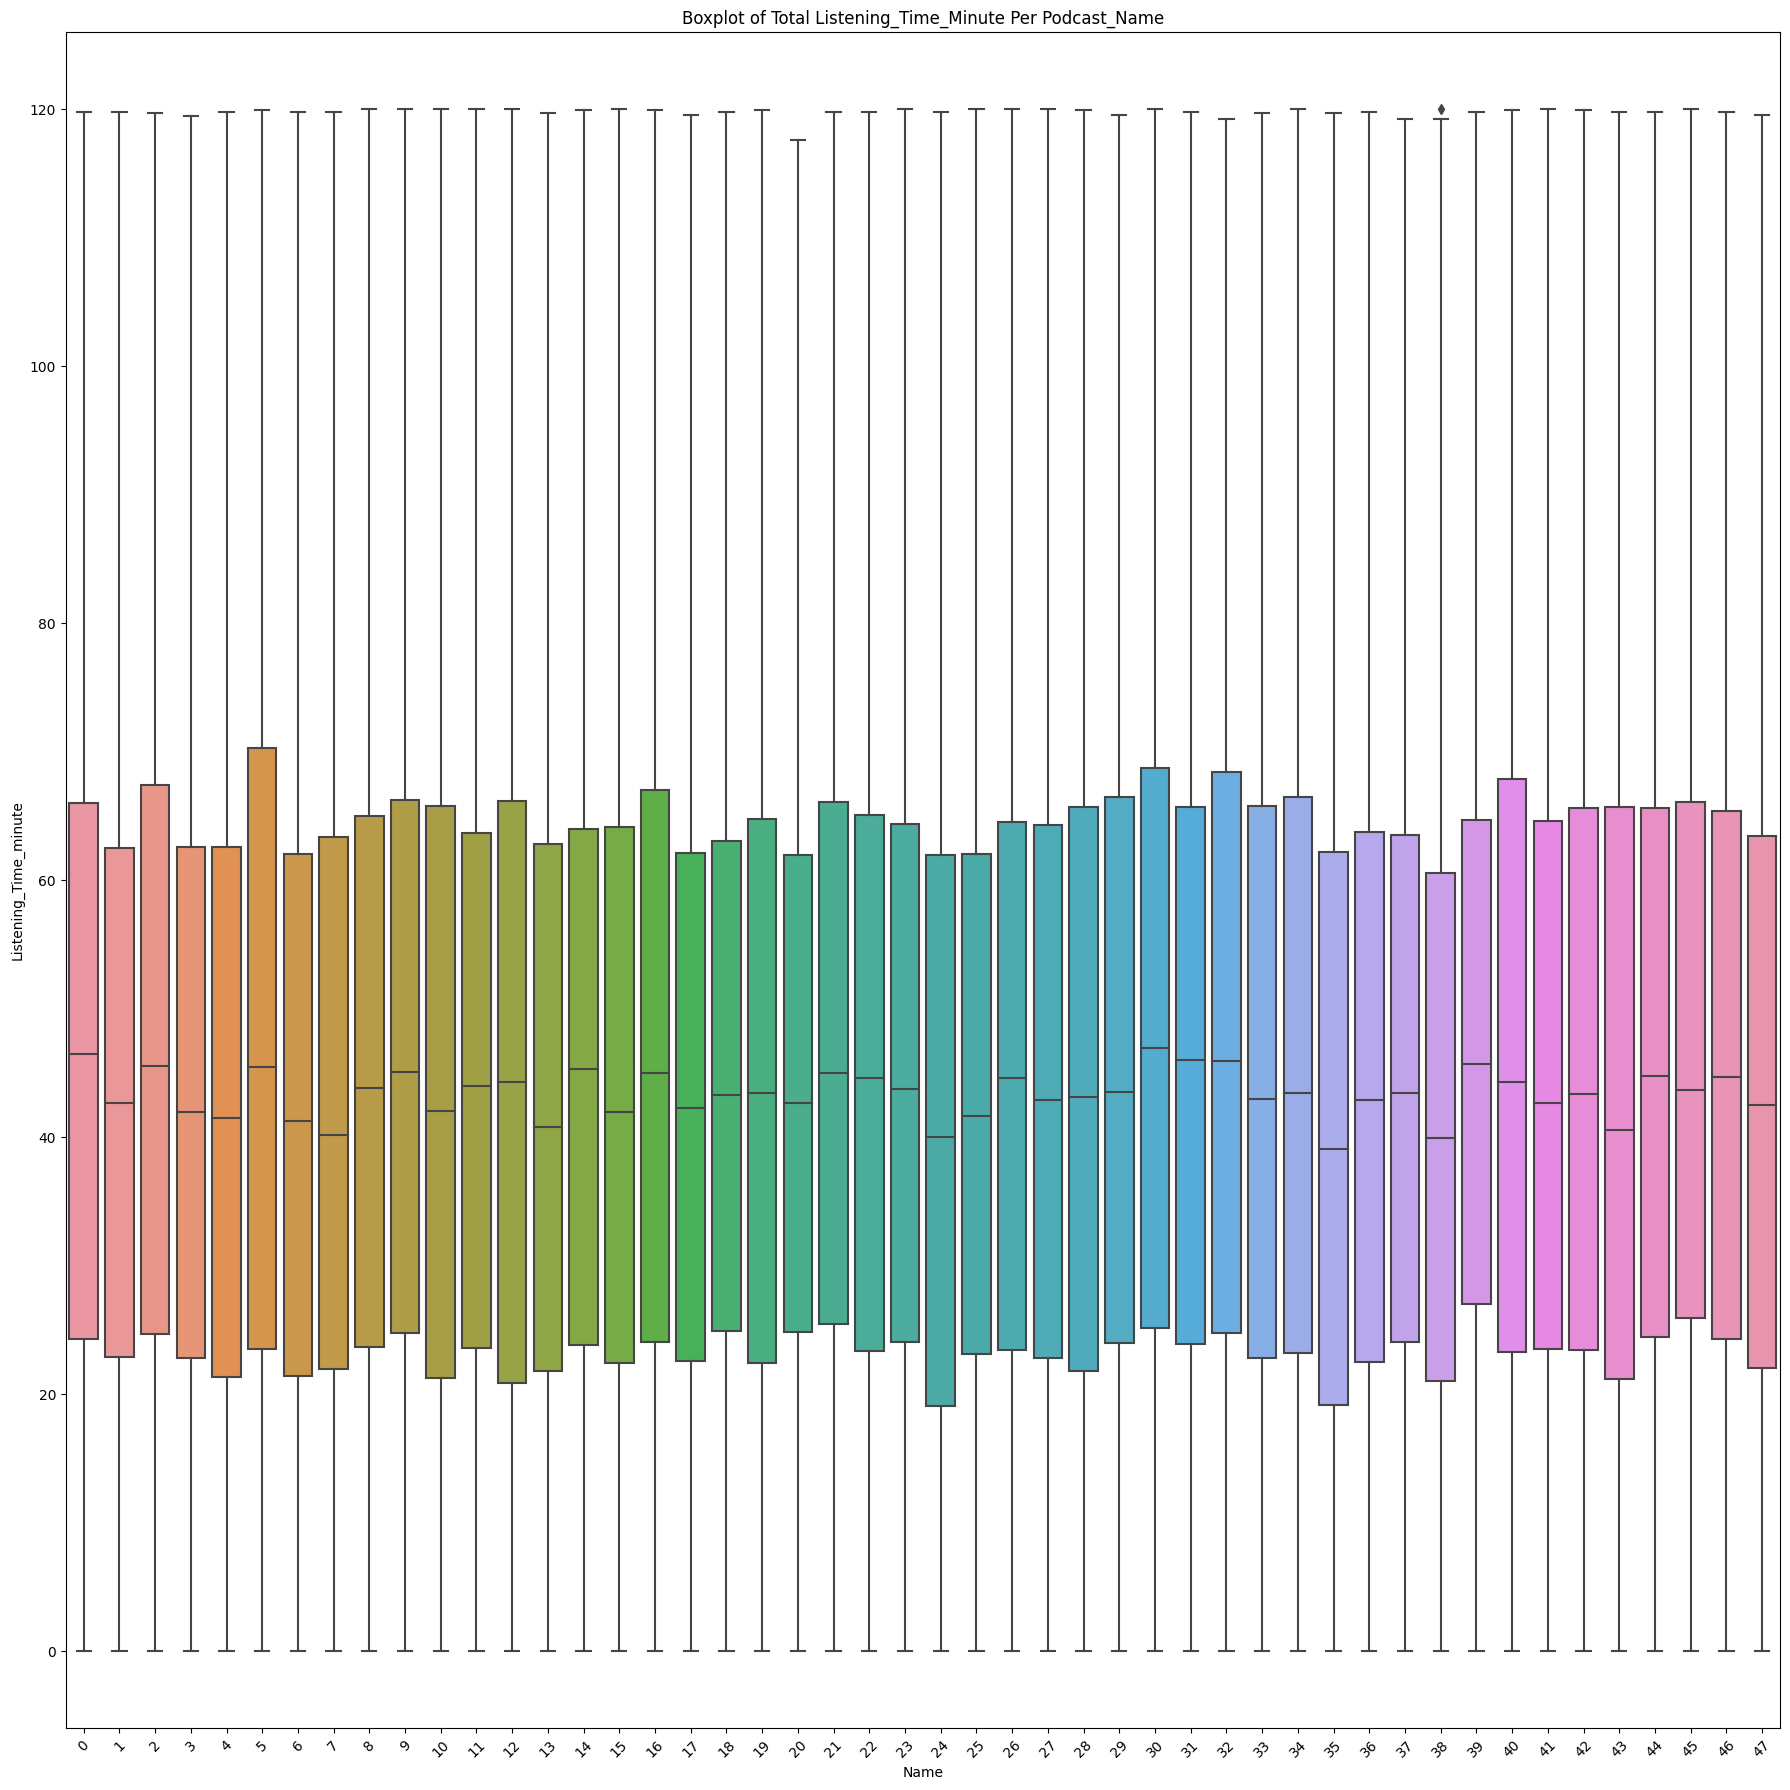

In [40]:
# Plot using a bar plot
plt.figure(figsize=(18, 18))
sns.boxplot(data = train, x ='Podcast_Name', y = 'Listening_Time_minutes')
plt.title('Boxplot of Total Listening_Time_Minute Per Podcast_Name')
plt.xlabel('Name')
plt.ylabel('Listening_Time_minute')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
train.shape

(749992, 13)

In [42]:
# Identify outliers for 'Healthy Living' quantitatively
sports_central_data = train[train['Podcast_Name'] == 38]['Listening_Time_minutes']

# Calculate Q1, Q3, and IQR
Q1 = sports_central_data.quantile(0.25)
Q3 = sports_central_data.quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
sports_central_outliers = sports_central_data.index[(sports_central_data < lower_bound) | (sports_central_data > upper_bound)]
print("\nOutliers for 'Sports Central' podcast (Listening Time in minutes):")
print(sports_central_outliers)
print(f"Number of outliers: {len(sports_central_outliers)}")
print(f"Lower bound: {lower_bound:.2f} minutes")
print(f"Upper bound: {upper_bound:.2f} minutes")

#Remove outliers
train.drop(sports_central_outliers,inplace=True)



Outliers for 'Sports Central' podcast (Listening Time in minutes):
Index([73010], dtype='int64')
Number of outliers: 1
Lower bound: -38.36 minutes
Upper bound: 119.92 minutes


/tmp/ipykernel_31/613912972.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(sports_central_outliers,inplace=True)


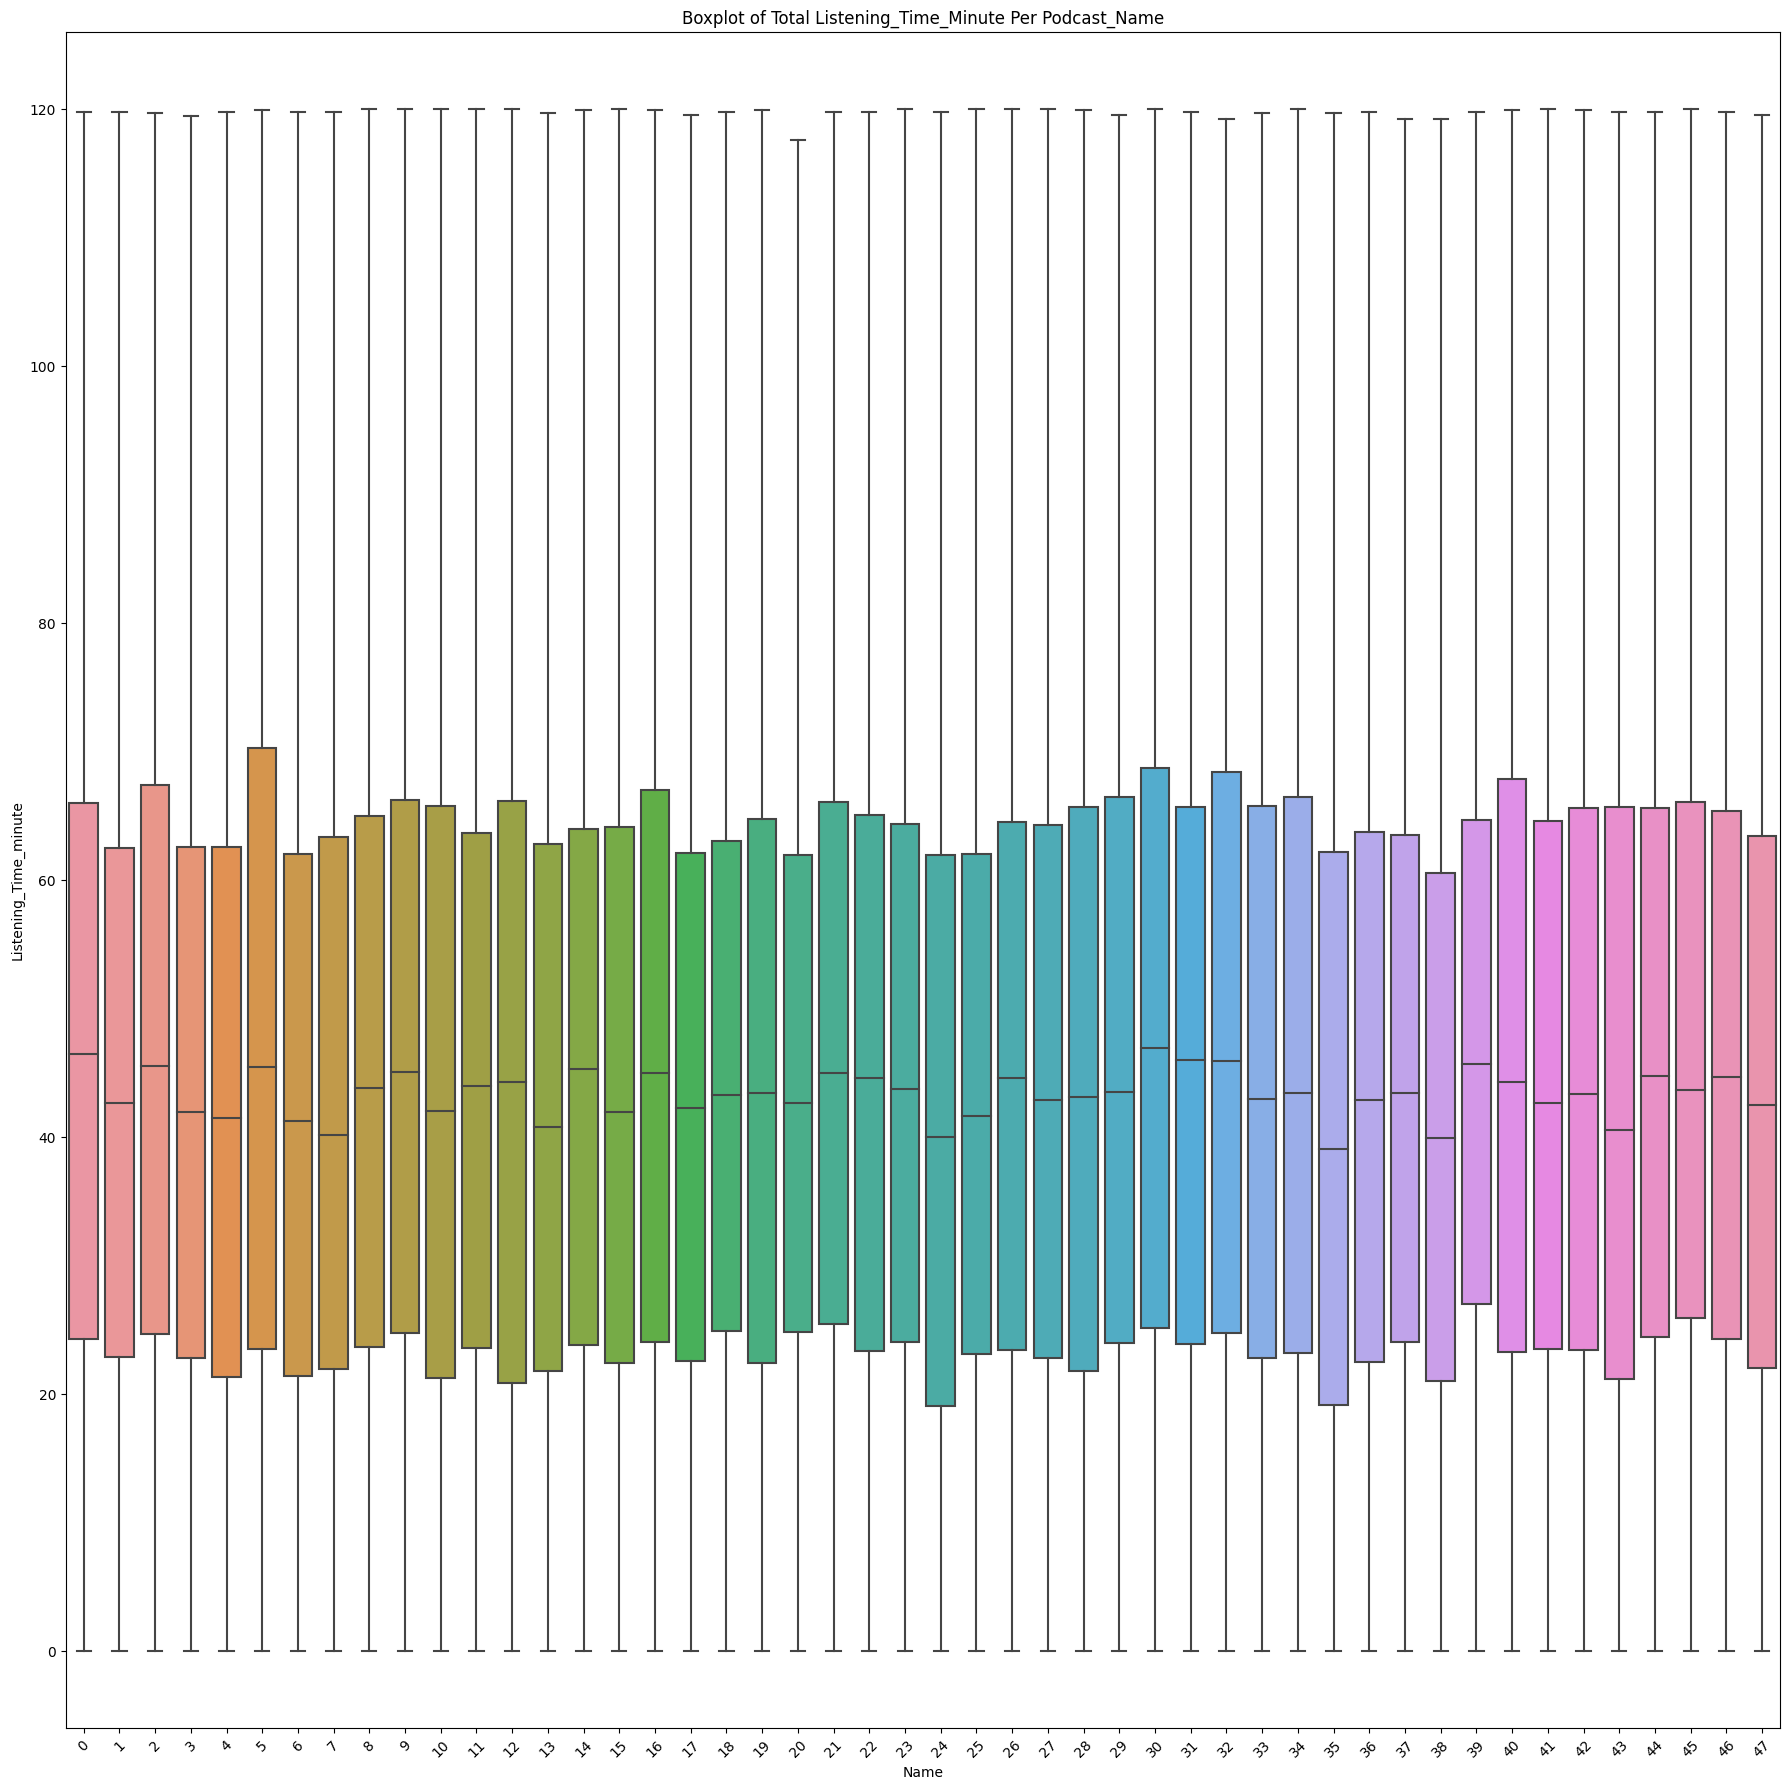

In [43]:
# Plot using a bar plot
plt.figure(figsize=(18, 18))
sns.boxplot(data = train, x ='Podcast_Name', y = 'Listening_Time_minutes')
plt.title('Boxplot of Total Listening_Time_Minute Per Podcast_Name')
plt.xlabel('Name')
plt.ylabel('Listening_Time_minute')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
train.shape

(749991, 13)

In [45]:
train

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,length_bucket,Guest_Popularity_bucket,Host_Popularity_bucket
0,0,34,98.0,NaN,9,74.81,NaN,0.0,2,31.41998,NaN,NaN,long
1,1,24,26.0,119.800003,1,66.95,75.95,2.0,0,88.01241,very_long,long,long
2,2,40,16.0,73.900002,2,69.97,8.97,0.0,0,44.92531,long,immfamous,long
3,3,10,45.0,67.169998,8,57.22,78.70,2.0,2,46.27824,long,long,moderately_popular
4,4,31,86.0,110.510002,3,80.07,58.68,3.0,1,75.61031,very_long,moderately_popular,very_long
...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,26,25.0,75.660004,2,69.36,NaN,0.0,0,56.87058,long,NaN,long
749996,749996,2,21.0,75.750000,0,35.21,NaN,2.0,1,45.46242,long,NaN,less_popular
749997,749997,28,51.0,30.980000,4,78.58,84.89,0.0,0,15.26000,medium,very_long,long
749998,749998,41,47.0,108.980003,4,45.39,93.27,0.0,0,100.72939,very_long,very_long,moderately_popular


In [46]:
pip install dython

Note: you may need to restart the kernel to use updated packages.


# ***6. XGB Regressor***

In [47]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [48]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from cuml.preprocessing import TargetEncoder
from xgboost import XGBRegressor

/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 314, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))


In [49]:
TRAIN = [i for i in train.columns if i != 'Listening_Time_minutes' and i != 'id' and i != 'Episode_Title']
PRED = 'Listening_Time_minutes'

In [50]:
X = train[TRAIN].copy()
y = train[PRED].copy()
X_test = test[TRAIN].copy()

In [51]:
X

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Podcast_Name,Episode_Length_minutes,Genre,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,length_bucket,Guest_Popularity_bucket,Host_Popularity_bucket
0,34,NaN,9,74.81,NaN,0.0,2,NaN,NaN,long
1,24,119.800003,1,66.95,75.95,2.0,0,very_long,long,long
2,40,73.900002,2,69.97,8.97,0.0,0,long,immfamous,long
3,10,67.169998,8,57.22,78.70,2.0,2,long,long,moderately_popular
4,31,110.510002,3,80.07,58.68,3.0,1,very_long,moderately_popular,very_long
...,...,...,...,...,...,...,...,...,...,...
749995,26,75.660004,2,69.36,NaN,0.0,0,long,NaN,long
749996,2,75.750000,0,35.21,NaN,2.0,1,long,NaN,less_popular
749997,28,30.980000,4,78.58,84.89,0.0,0,medium,very_long,long
749998,41,108.980003,4,45.39,93.27,0.0,0,very_long,very_long,moderately_popular


In [52]:
FOLDS = 10
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
oof = np.zeros(len(X))
pred_test = np.zeros((len(X_test), FOLDS))

for fold, (train_idx, val_idx) in enumerate(kf.split(X, y), start=1):
    print(f"Training fold {fold} ...")
    
    X_train = X.iloc[train_idx].copy()
    y_train = y.iloc[train_idx]
    X_val   = X.iloc[val_idx].copy()
    y_val   = y.iloc[val_idx]
    
    model = XGBRegressor(
        device='cuda',
        enable_categorical=True,
        n_estimators=550,
        learning_rate=0.02,
        max_depth=11,
        subsample=0.8,
        colsample_bynode=0.6,
        random_state=42,
        verbosity=1,
    )
    
    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        verbose=10000,
    )
    
    oof[val_idx] = model.predict(X_val)
    pred_test[:, fold - 1] = model.predict(X_test)

Training fold 1 ...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [05:38:30] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:26.53001
[549]	validation_0-rmse:12.83412
Training fold 2 ...
[0]	validation_0-rmse:26.65541


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [05:40:08] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


[549]	validation_0-rmse:12.79072
Training fold 3 ...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [05:41:47] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:26.77920
[549]	validation_0-rmse:13.04136
Training fold 4 ...
[0]	validation_0-rmse:26.76205


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [05:43:24] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


[549]	validation_0-rmse:12.92985
Training fold 5 ...
[0]	validation_0-rmse:26.72539


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [05:44:58] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


[549]	validation_0-rmse:12.90468
Training fold 6 ...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [05:46:34] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:26.81973
[549]	validation_0-rmse:12.87597
Training fold 7 ...
[0]	validation_0-rmse:26.76076


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [05:48:10] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


[549]	validation_0-rmse:12.89422
Training fold 8 ...
[0]	validation_0-rmse:26.77796


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [05:49:47] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


[549]	validation_0-rmse:12.97003
Training fold 9 ...
[0]	validation_0-rmse:26.72810


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [05:51:22] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


[549]	validation_0-rmse:12.85936
Training fold 10 ...
[0]	validation_0-rmse:26.69877


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [05:52:57] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


[549]	validation_0-rmse:12.91830


In [53]:
rmse = mean_squared_error(y, oof, squared=False)
print("Overall OOF RMSE:", rmse)

final_test_pred = pred_test.mean(axis=1)
print("Final test predictions (first 10 samples):")
print(final_test_pred[:10])

Overall OOF RMSE: 12.902033673434214
Final test predictions (first 10 samples):
[56.38861389 18.8819994  51.69660454 76.2310112  46.20938759 22.0824892
 85.0574379  41.94078598 64.24263268 77.99767227]


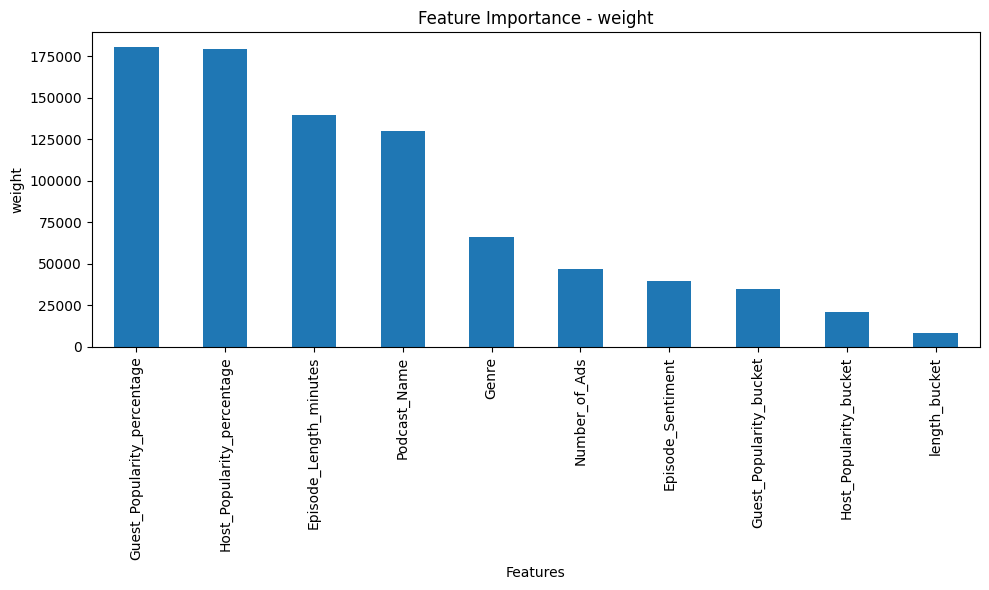

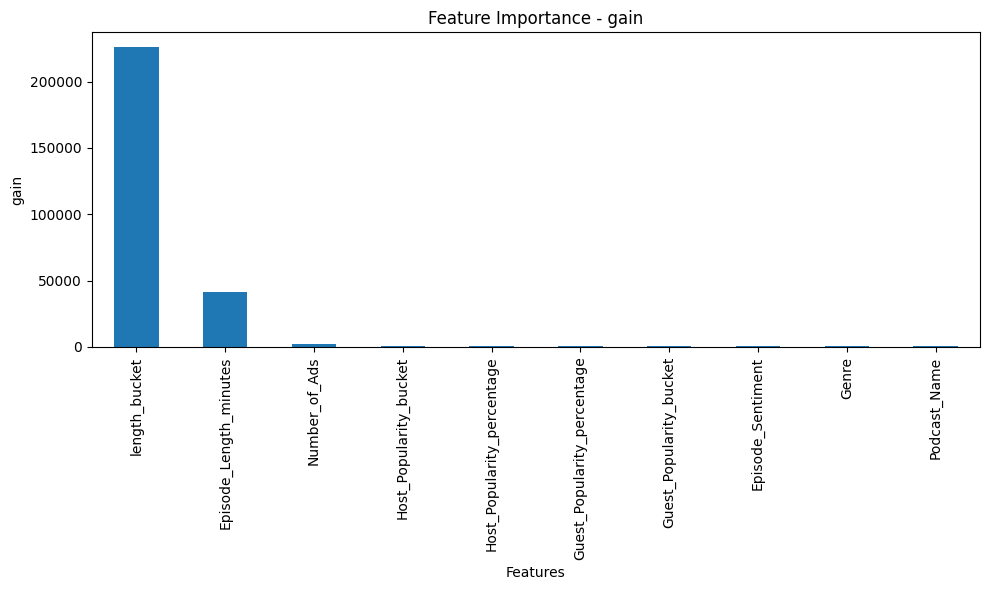

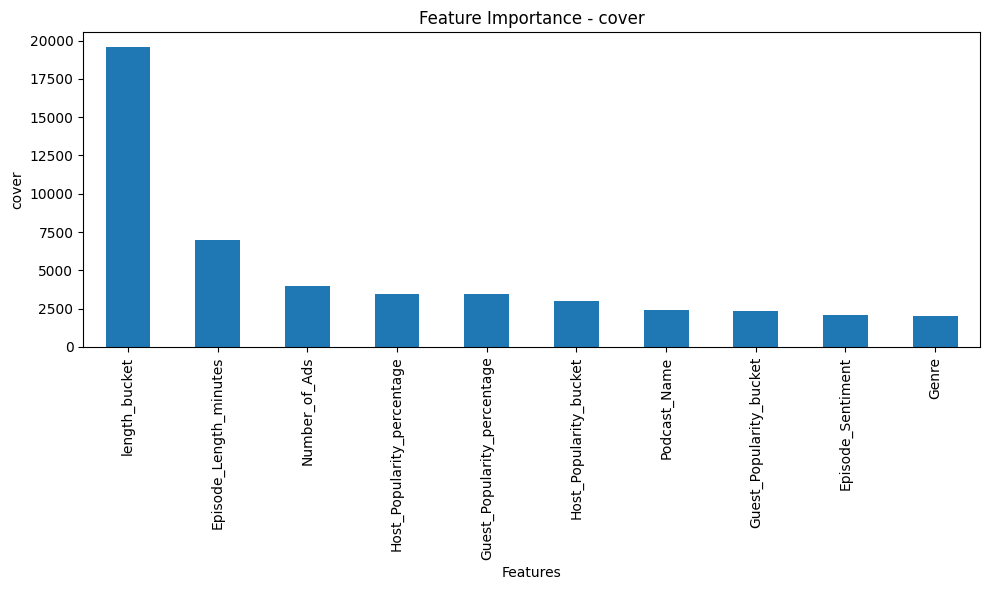

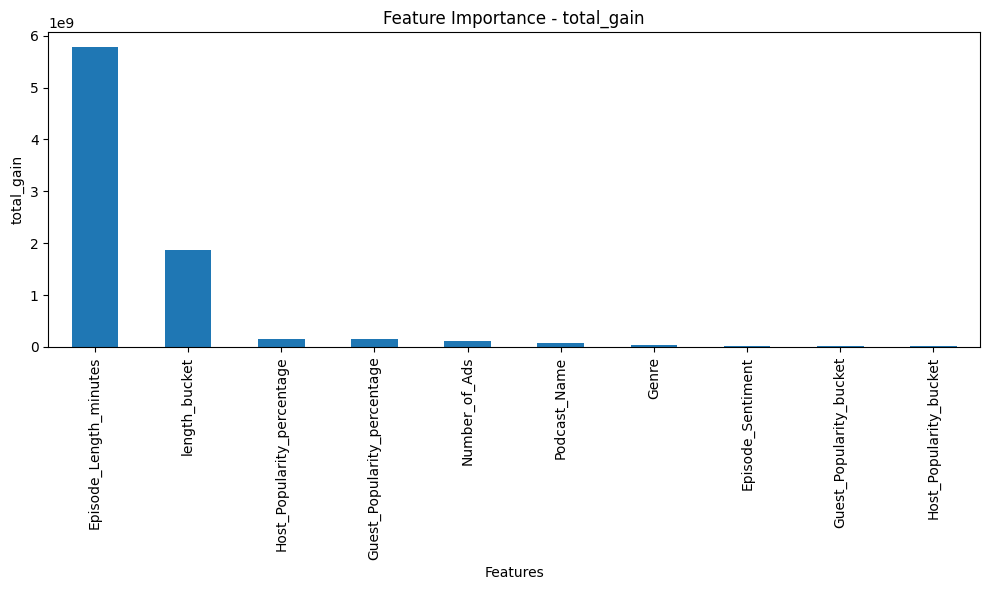

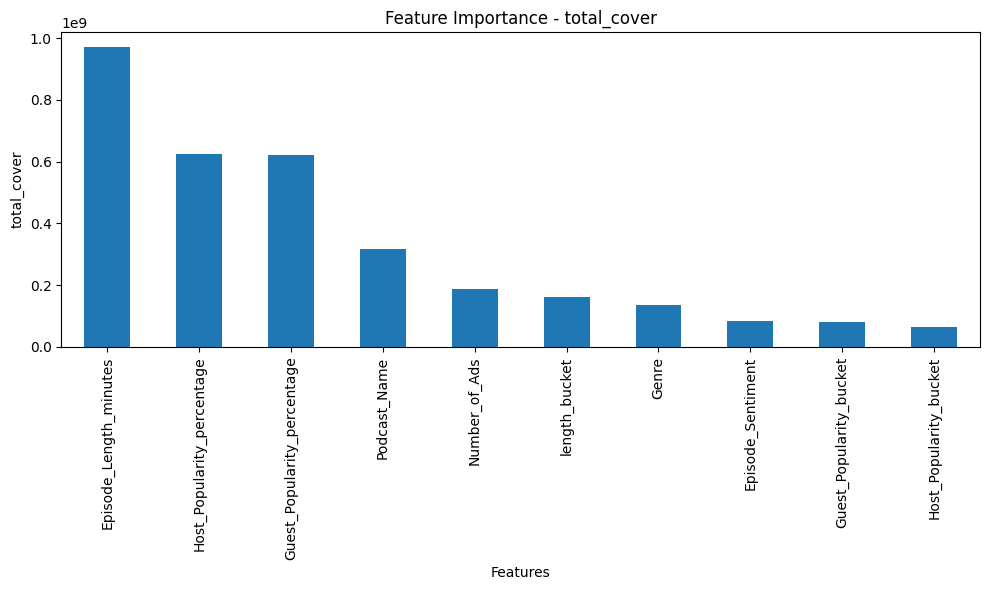

In [54]:
importance_types = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']

booster = model.get_booster()

for itype in importance_types:
    score = booster.get_score(importance_type=itype)
    score_series = pd.Series(score).sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    score_series.head(30).plot(kind='bar')
    plt.title(f"Feature Importance - {itype}")
    plt.ylabel(itype)
    plt.xlabel("Features")
    plt.tight_layout()
    plt.show()

In [55]:
sub = pd.read_csv('/kaggle/input/playground-series-s5e4/sample_submission.csv')
sub[PRED] = final_test_pred
sub.to_csv('submission.csv', index=False)
sub.head(10)

,id,Listening_Time_minutes
0,750000,56.388614
1,750001,18.881999
2,750002,51.696605
3,750003,76.231011
4,750004,46.209388
5,750005,22.082489
6,750006,85.057438
7,750007,41.940786
8,750008,64.242633
9,750009,77.997672


In [56]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 2 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      250000 non-null  int64  
 1   Listening_Time_minutes  250000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.8 MB
